In [ ]:
from multiprocessing import process
import os
os.chdir('/home/yoga-peter/engdeg/Jonus')
import glob
import matplotlib.pyplot as plt
import numpy as np
from ion_channel import IonChannel
import multiprocessing

import pandas as pd

def worker(file_path, batch_size):
    cnt = 0
    sum = 0
    file_data = []
    ic = IonChannel()
    ic._pol_ord = 1
    with open(file_path) as data_file:
        for record in data_file:
            if cnt < batch_size:
                record = record.strip()
                sum += float(record)
                cnt += 1
            else:
                cnt = 0
                file_data.append(sum / batch_size)
                sum = 0
    # Calculate autocorrelation
    _ = file_path.split('/')
    folder = _[-2]
    if(not os.path.exists(f"outputs2/{folder}")):
        os.mkdir(f"outputs2/{folder}")
    file_name = _[-1].split('.')[0]
    fig, ax = plt.subplots(1, 2, constrained_layout=True)
    fig.set_size_inches(12, 6)
    # fig.suptitle(f'Autocorrelation of {file_name}')
    fig, ax[0] = ic.calculate_autocorrelation_acf(file_data[:50000], fig, ax[0], lags=100)
    fig, ax[1] = ic.plot_autocorrelation_dfa(file_data[:50000], fig, ax[1])
    ic.save_figure(fig, folder+'/'+file_name, f'autocorrelation {ic._pol_ord}', False)


ic = IonChannel()
file_pattern = os.path.join("data", "normalna_aktywnosc", '*mV', "*.txt")
files = glob.glob(file_pattern)
if len(files) == 1:
    worker(files[0], ic, 1)
else:
    batch_size = 1
    stack = files
    core_count = multiprocessing.cpu_count()
    # Process each file
    while len(stack) != 0:
        processes = []
        n = len(stack)
        # print(n)
        for i in range(n if n <= core_count else core_count):
            # print(i)
            processes.append(multiprocessing.Process(target=worker, args=(stack.pop(), batch_size)))
            processes[i].start()
        for i in range(len(processes)):
            # print(len(processes))
            processes[i].join()

/home/yoga-peter/engdeg/Jonus
['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '40mV', 'e41.txt']


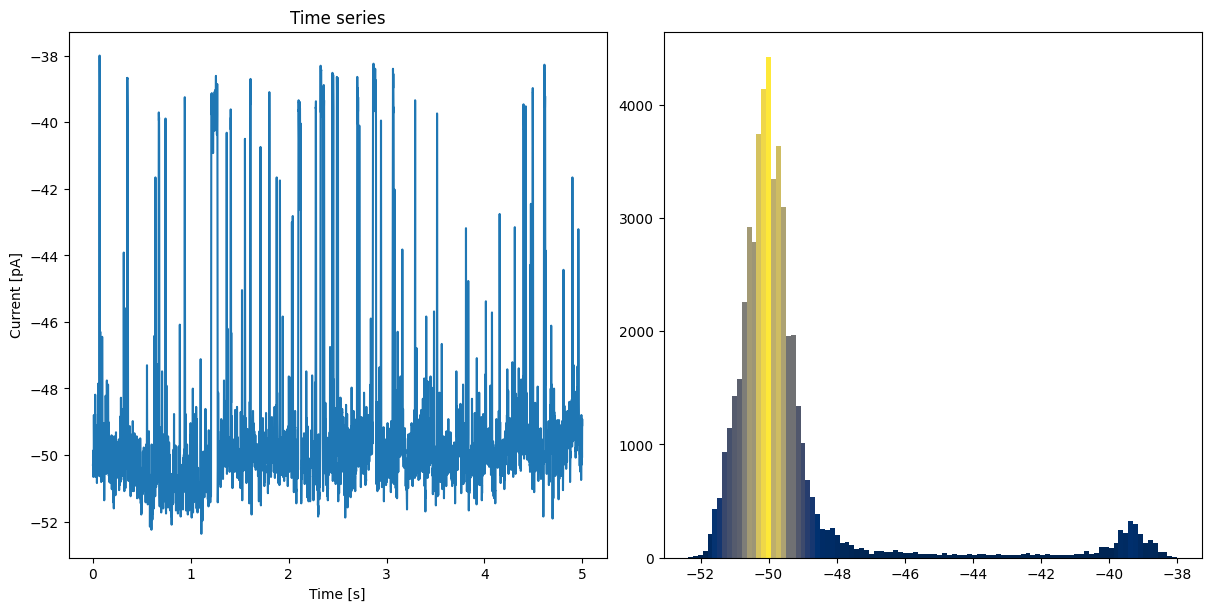

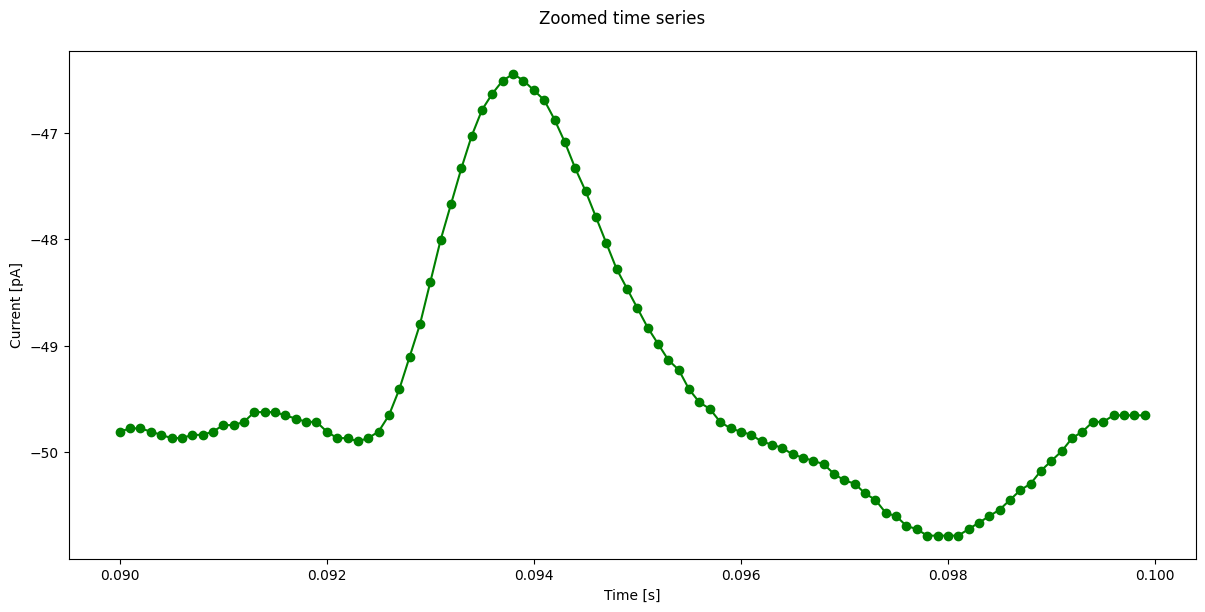

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '40mV', 'e20.txt']


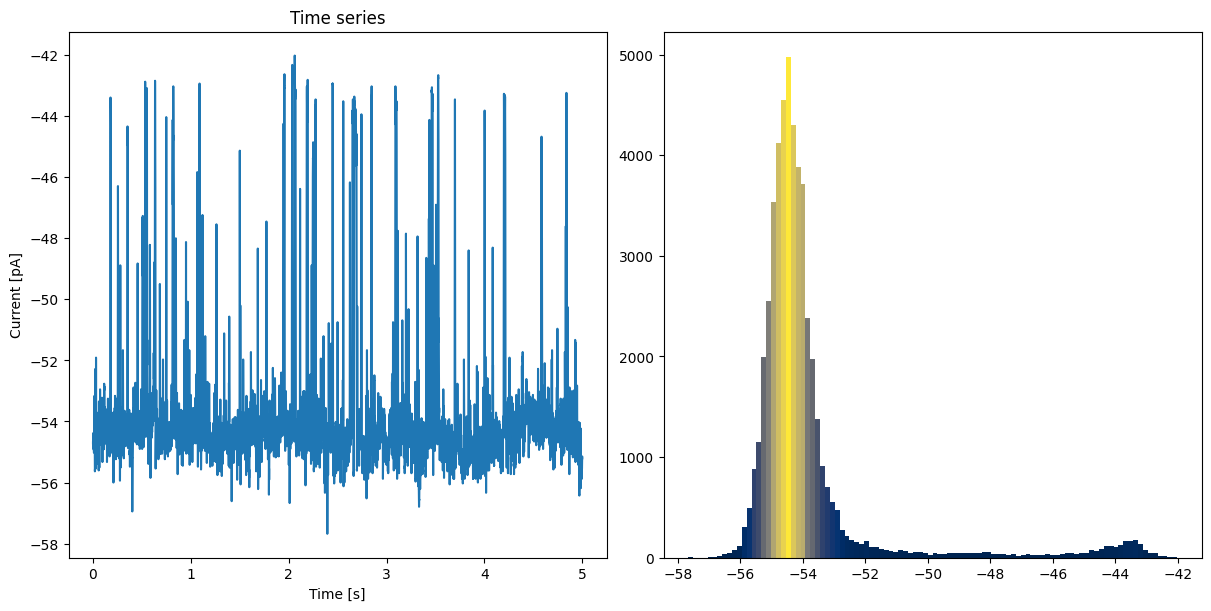

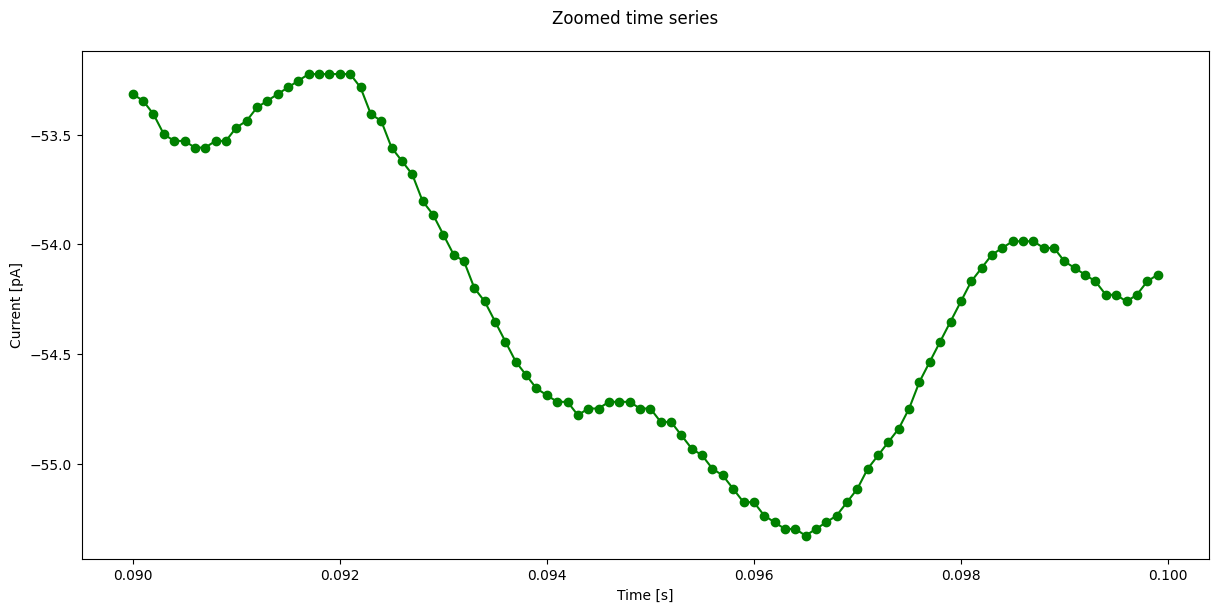

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '40mV', 'e34.txt']


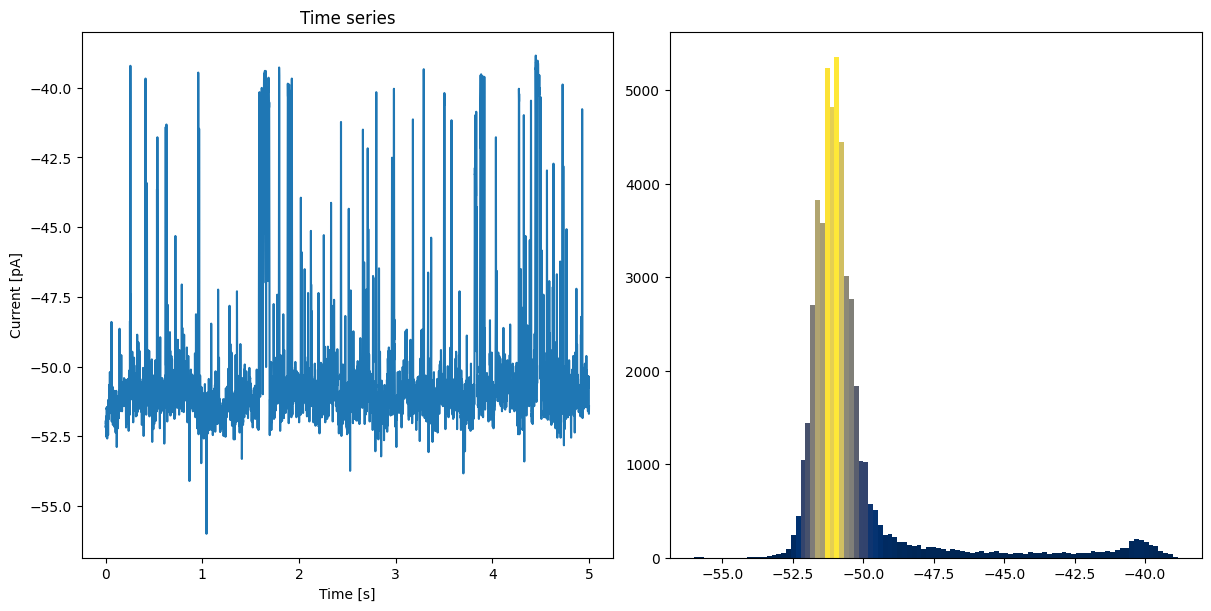

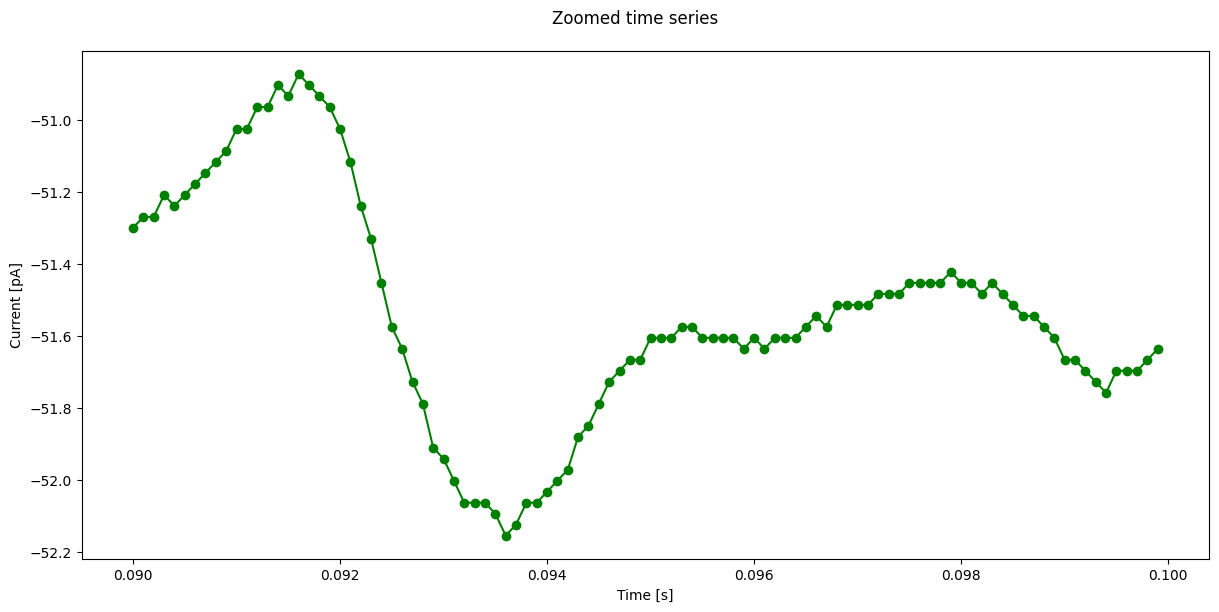

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '20mV', 'e42.txt']


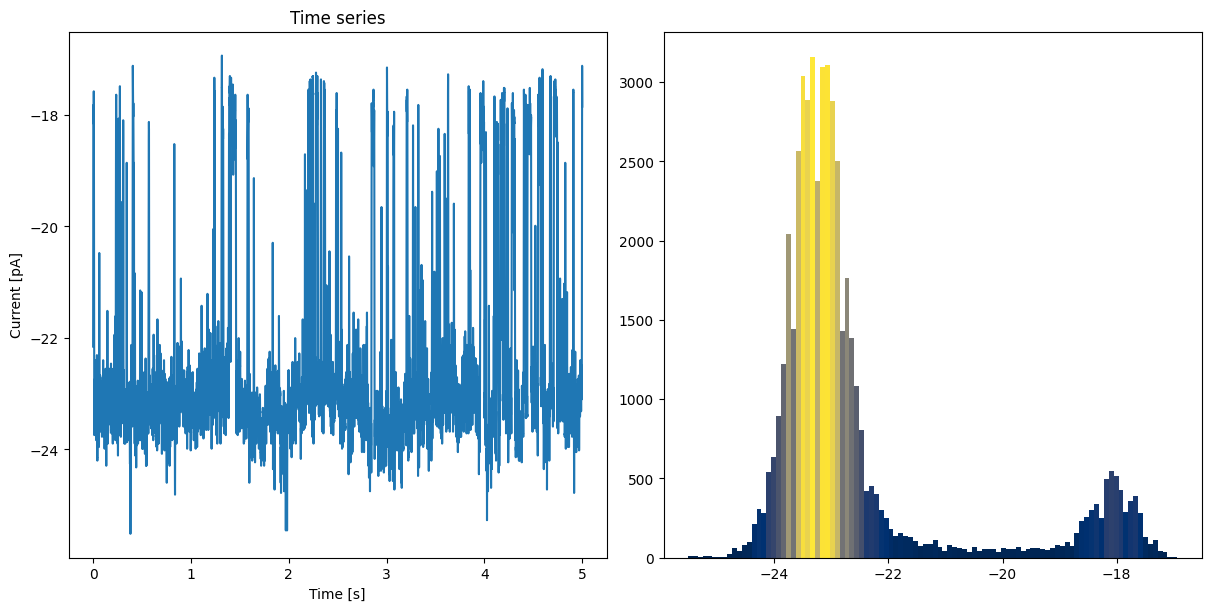

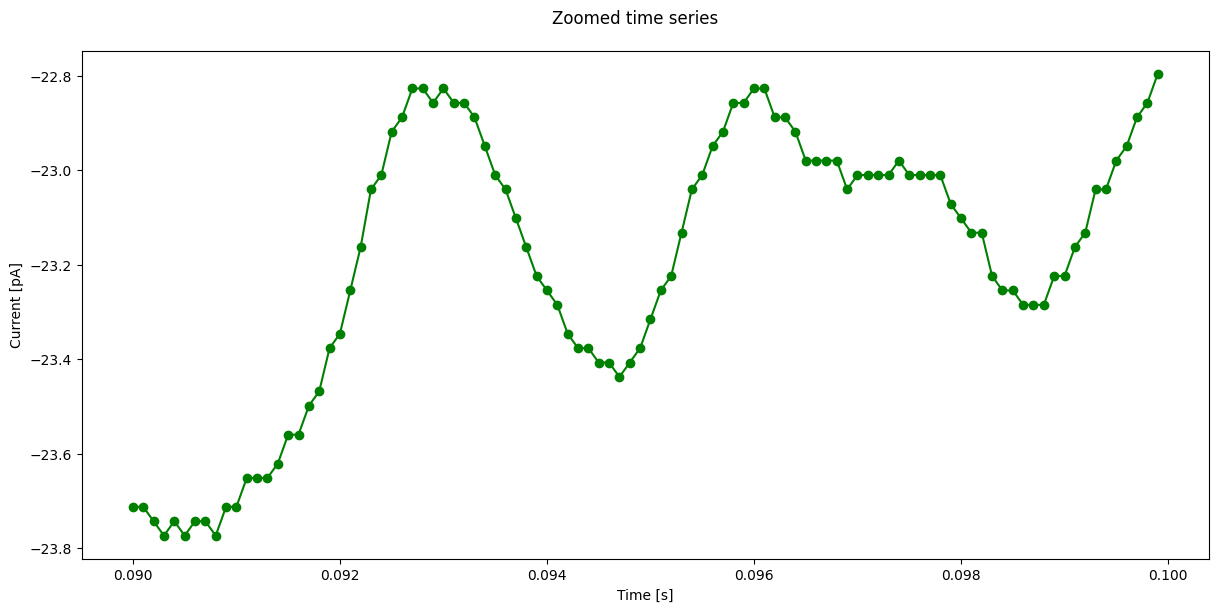

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '20mV', 'e49.txt']


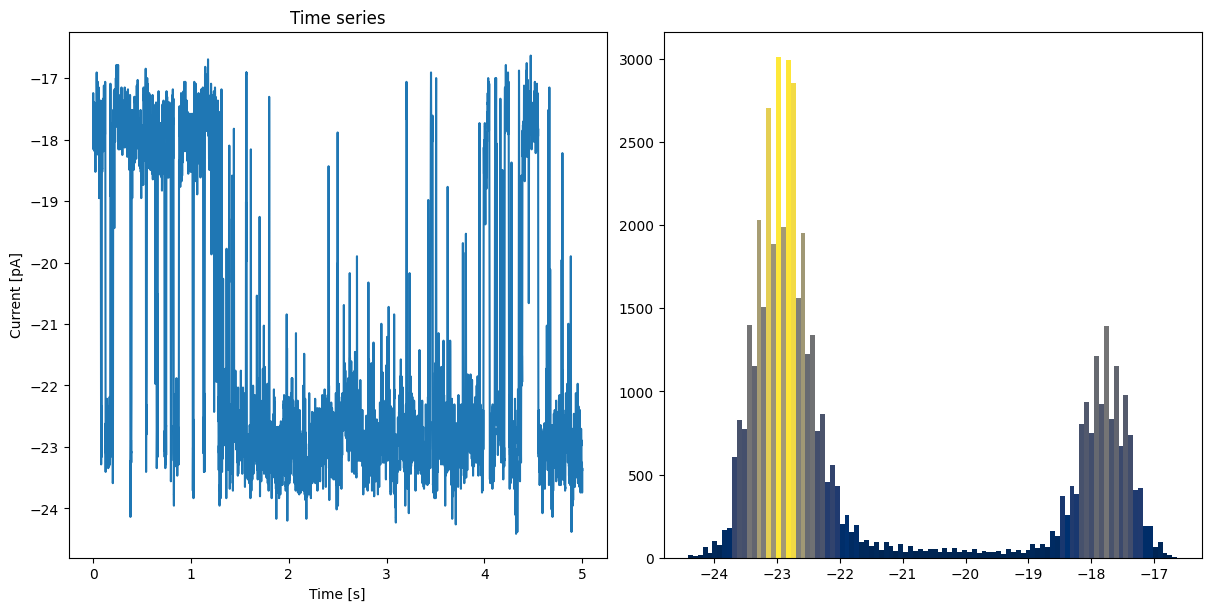

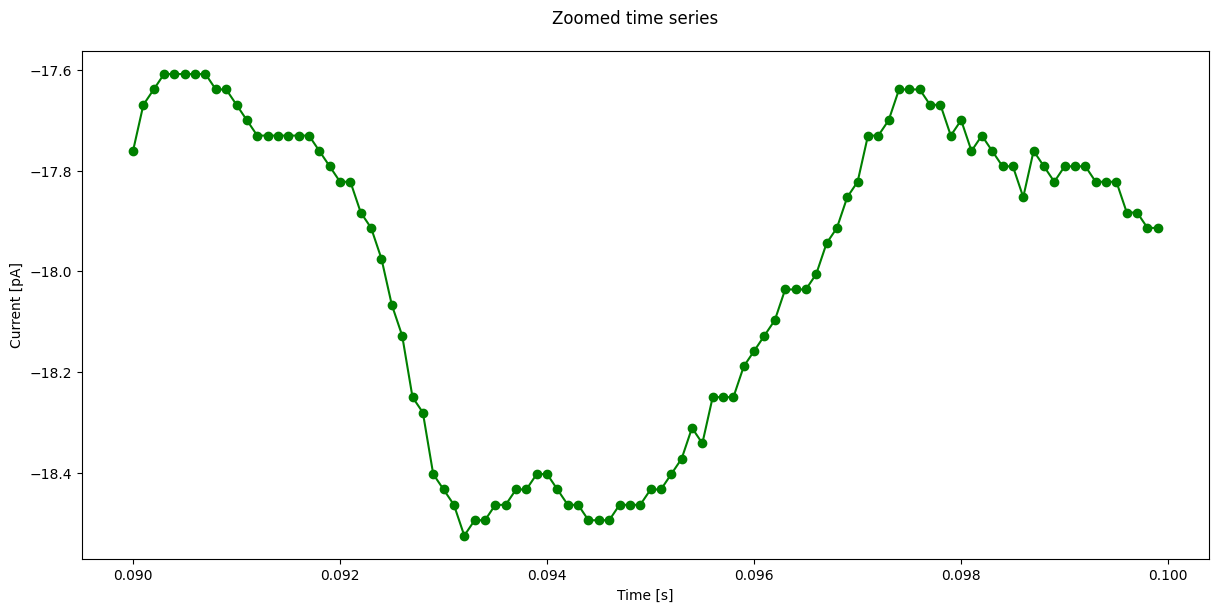

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '20mV', 'e14.txt']


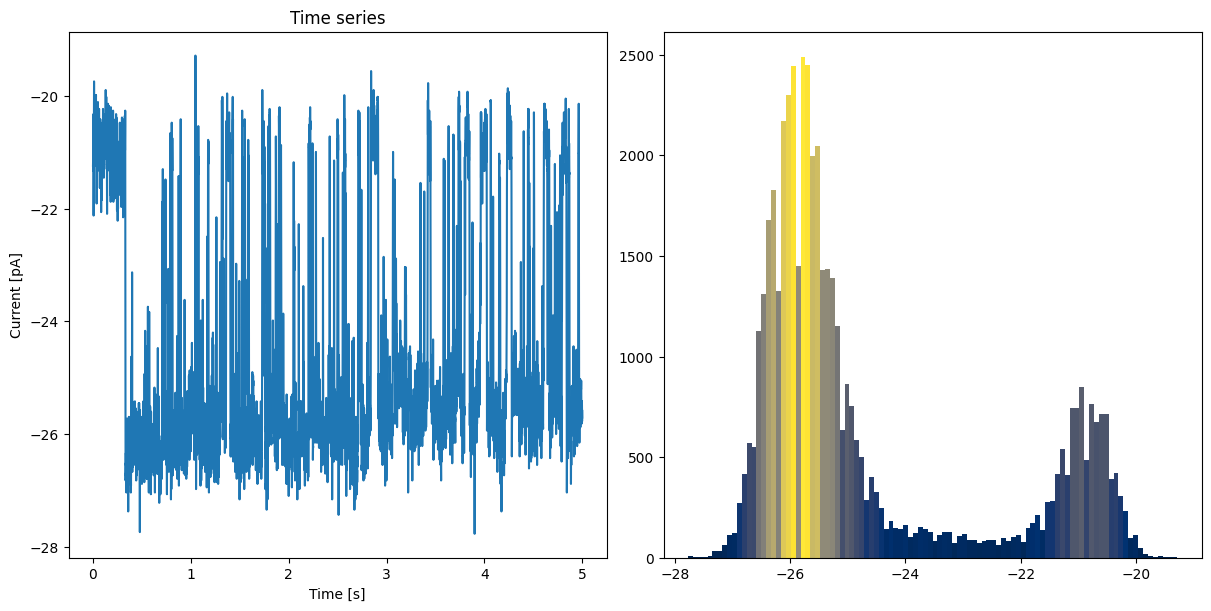

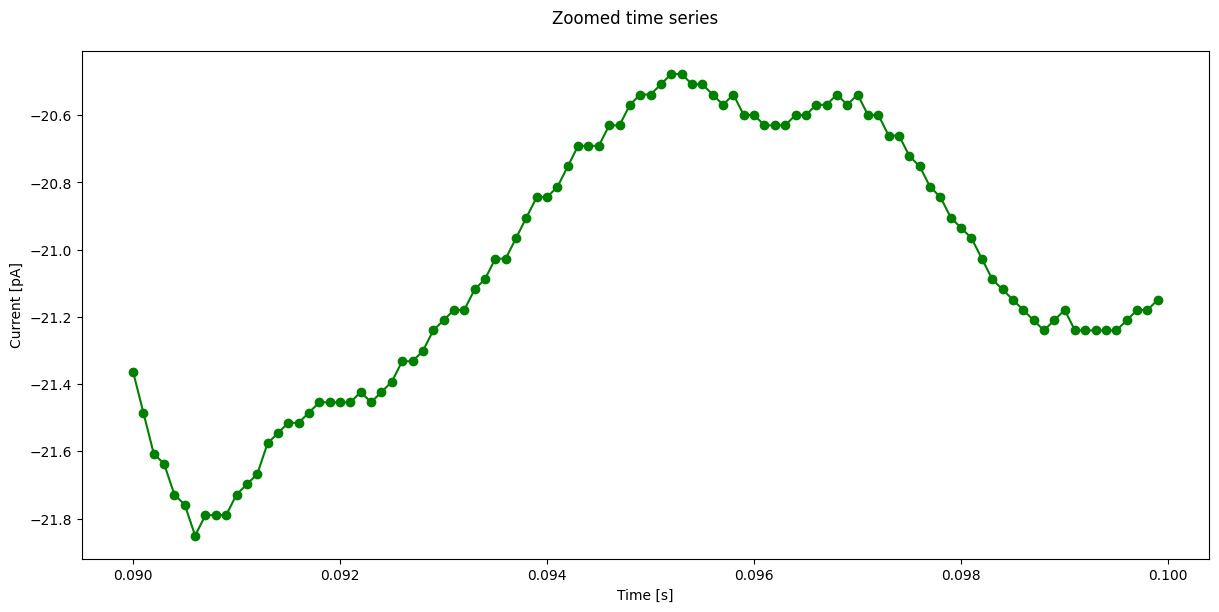

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '20mV', 'e35.txt']


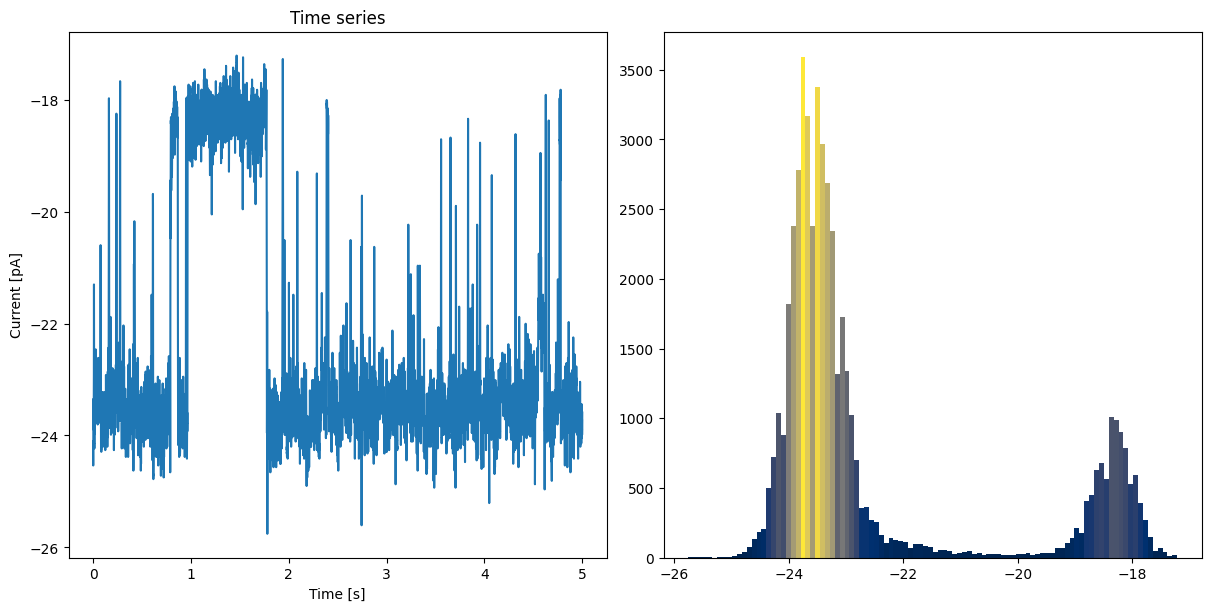

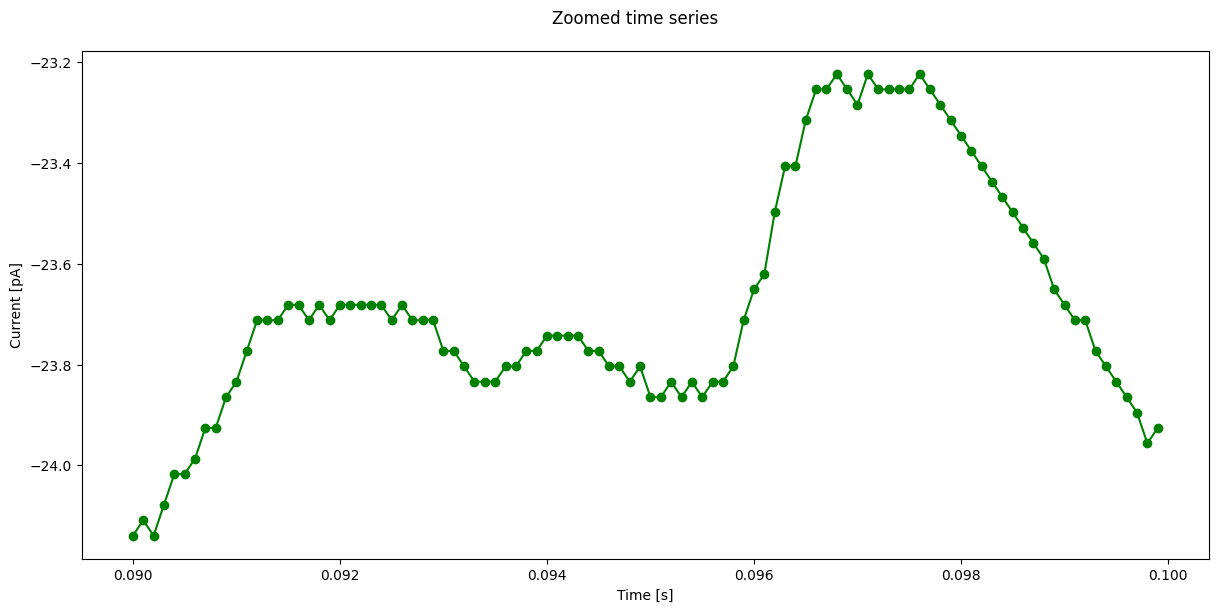

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '20mV', 'e21.txt']


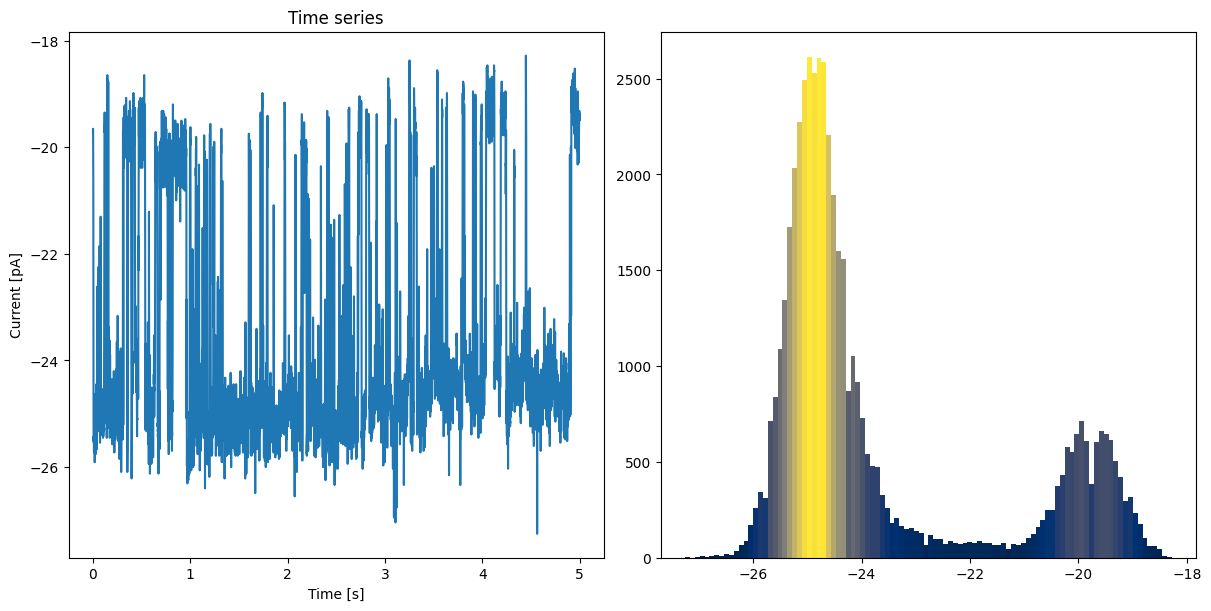

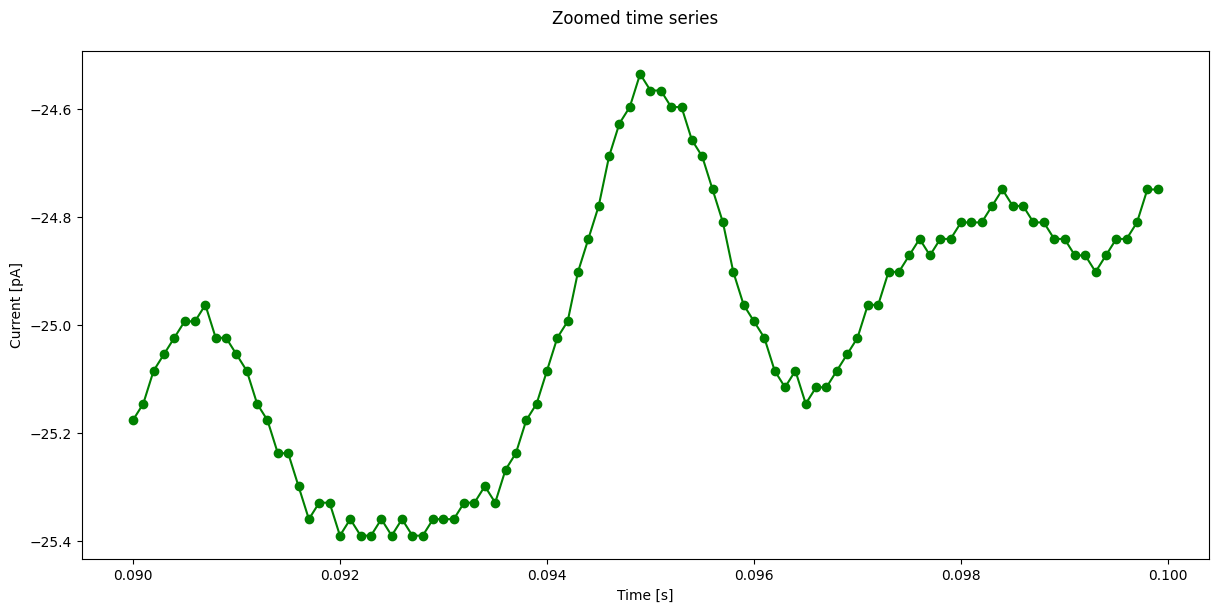

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-20mV', 'e72.txt']


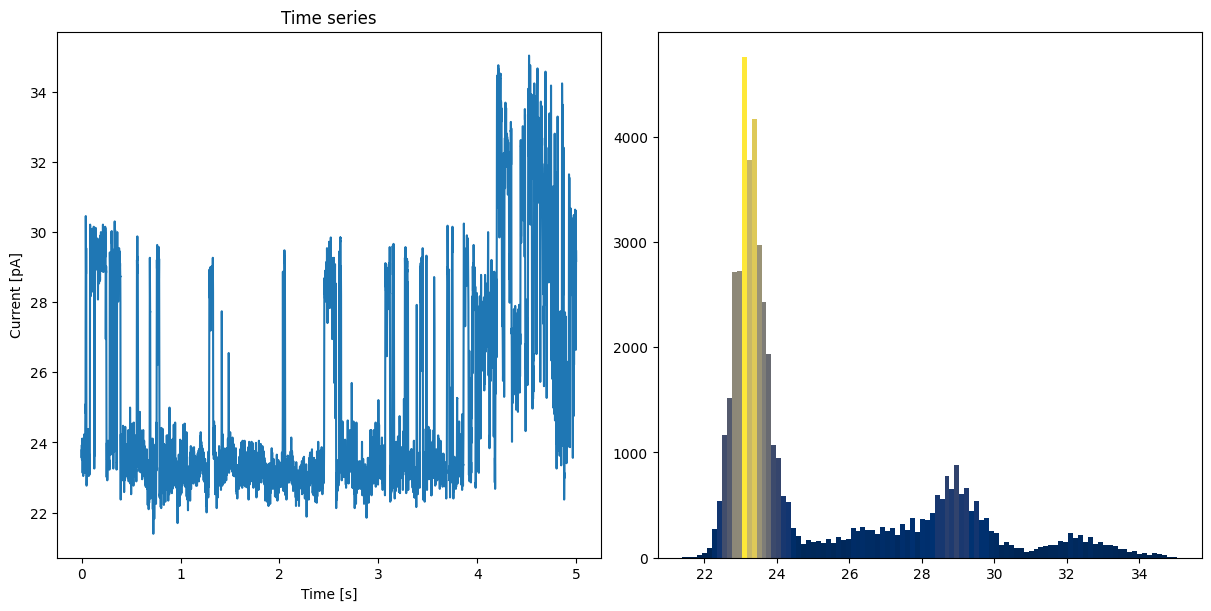

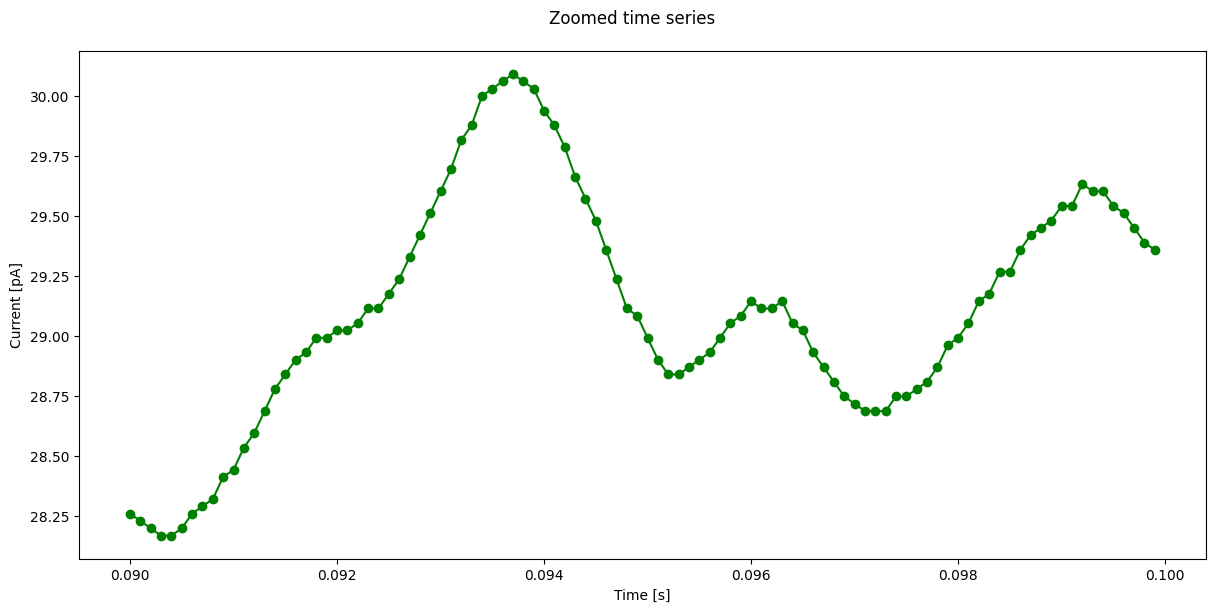

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-20mV', 'e23.txt']


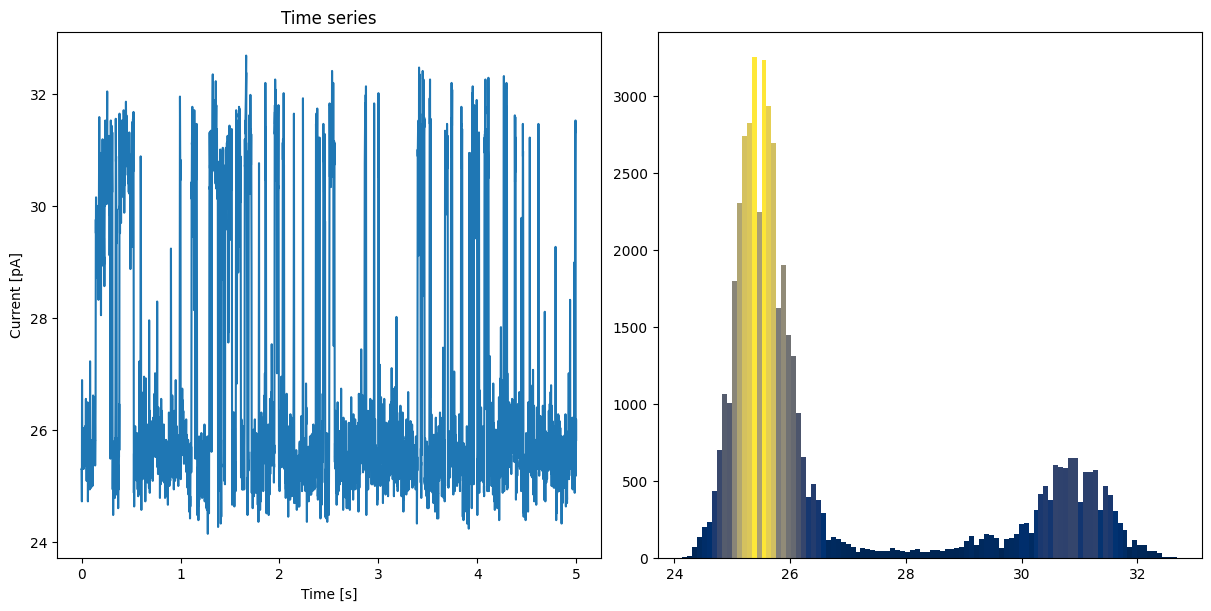

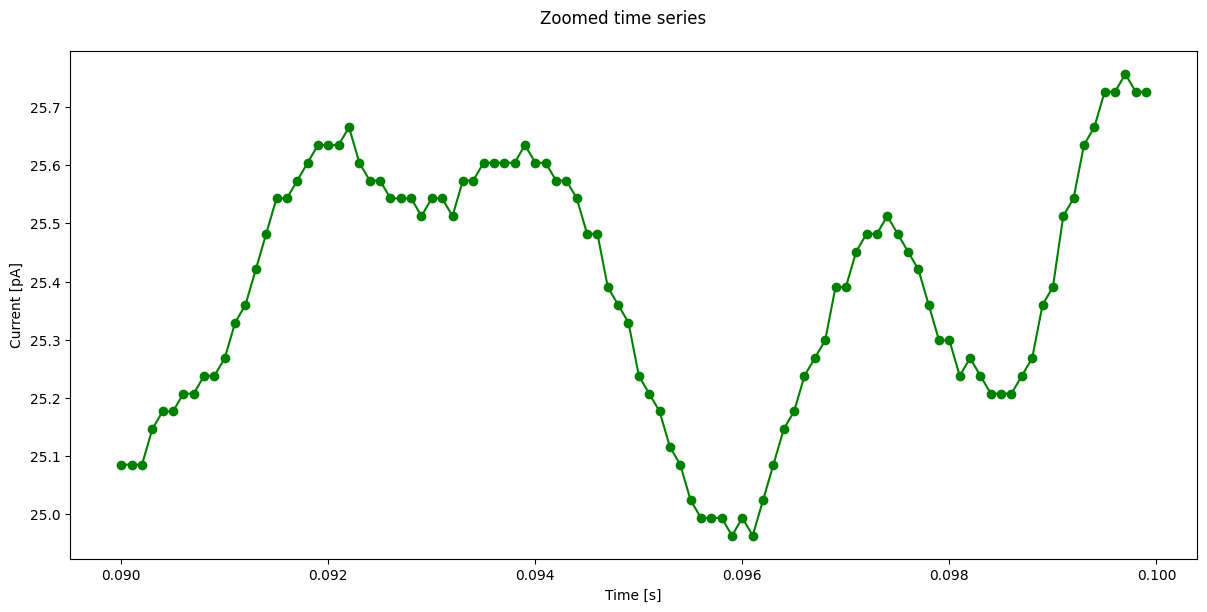

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-20mV', 'e44.txt']


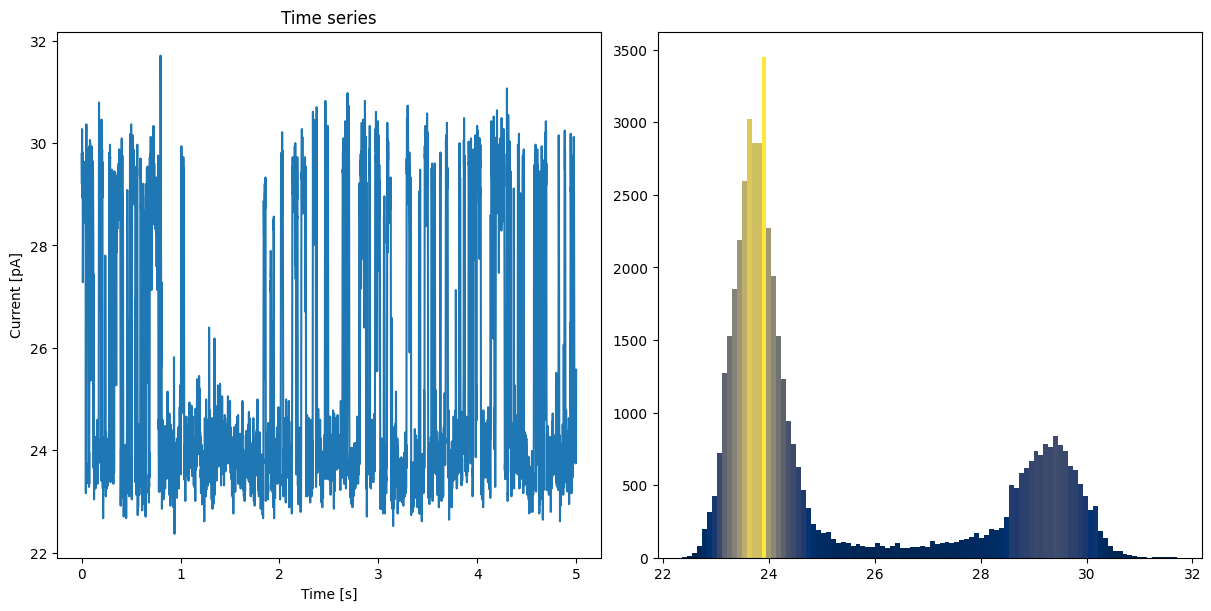

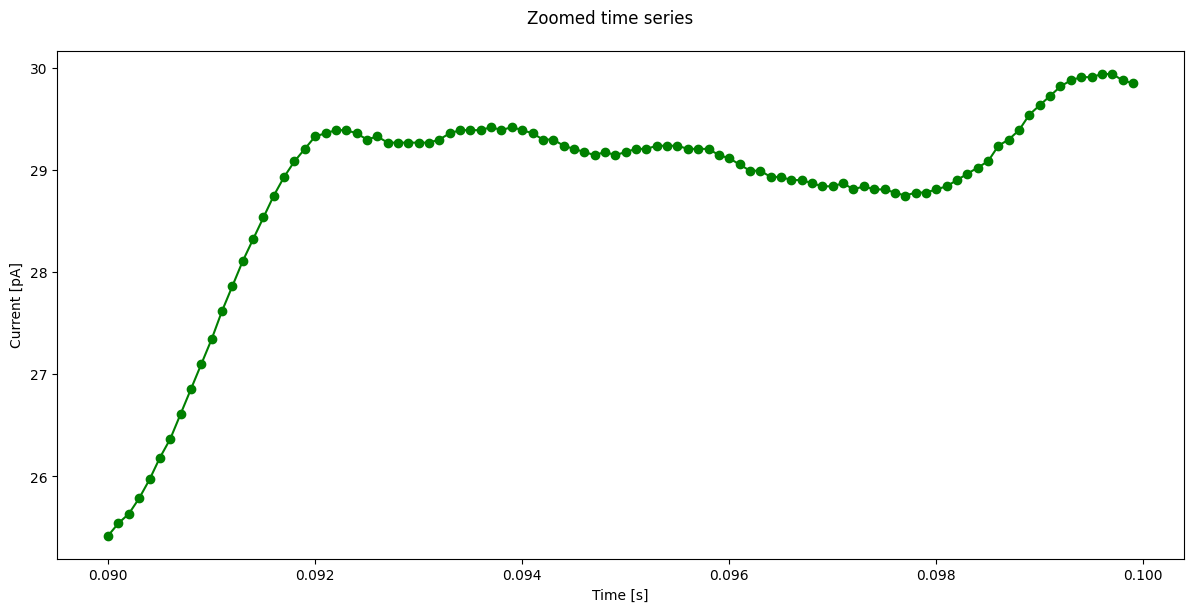

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-20mV', 'e9.txt']


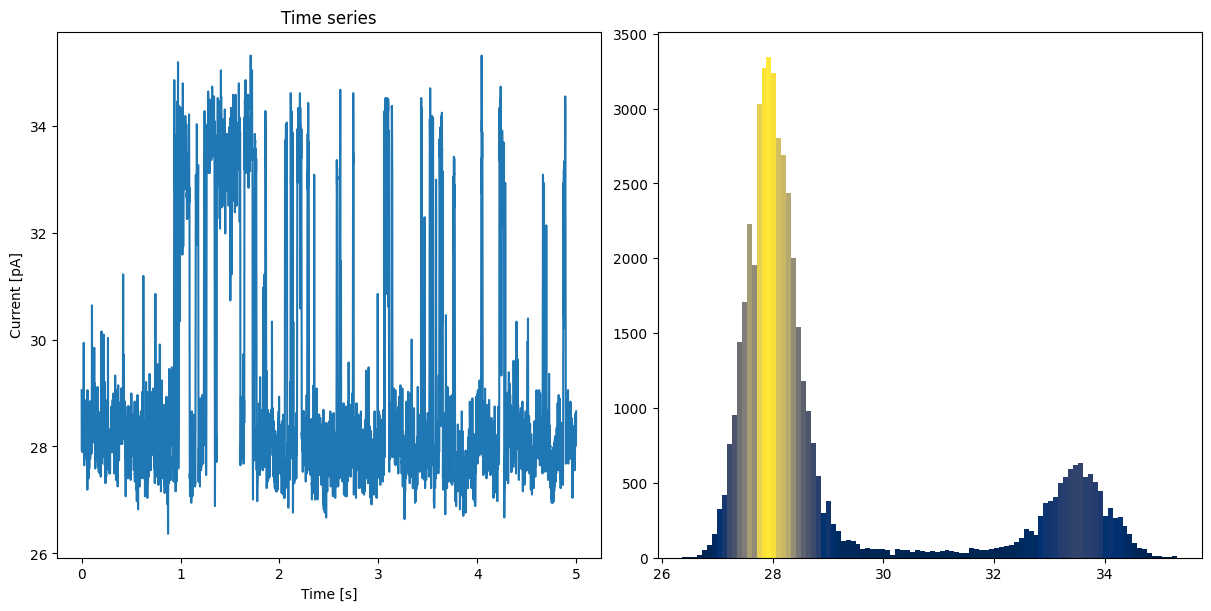

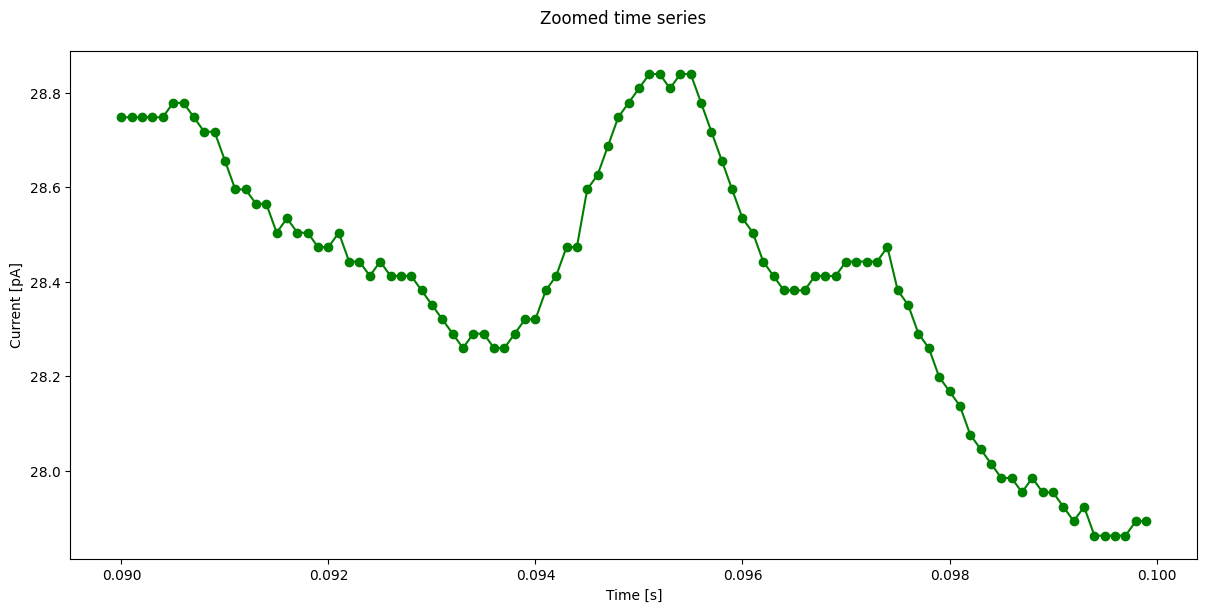

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-20mV', 'e65.txt']


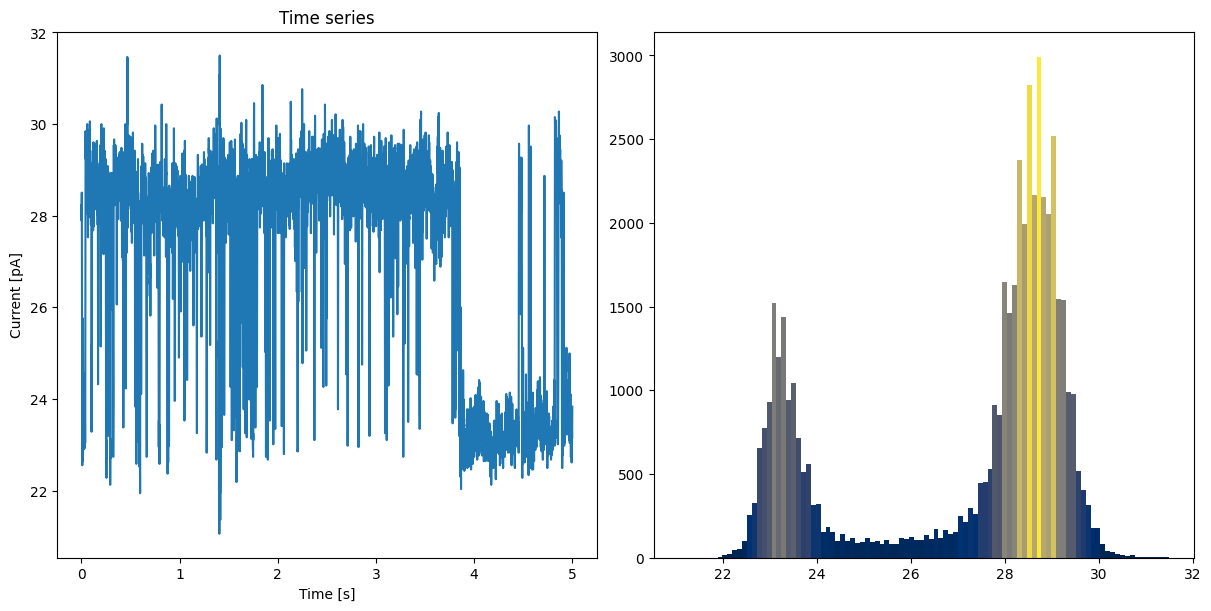

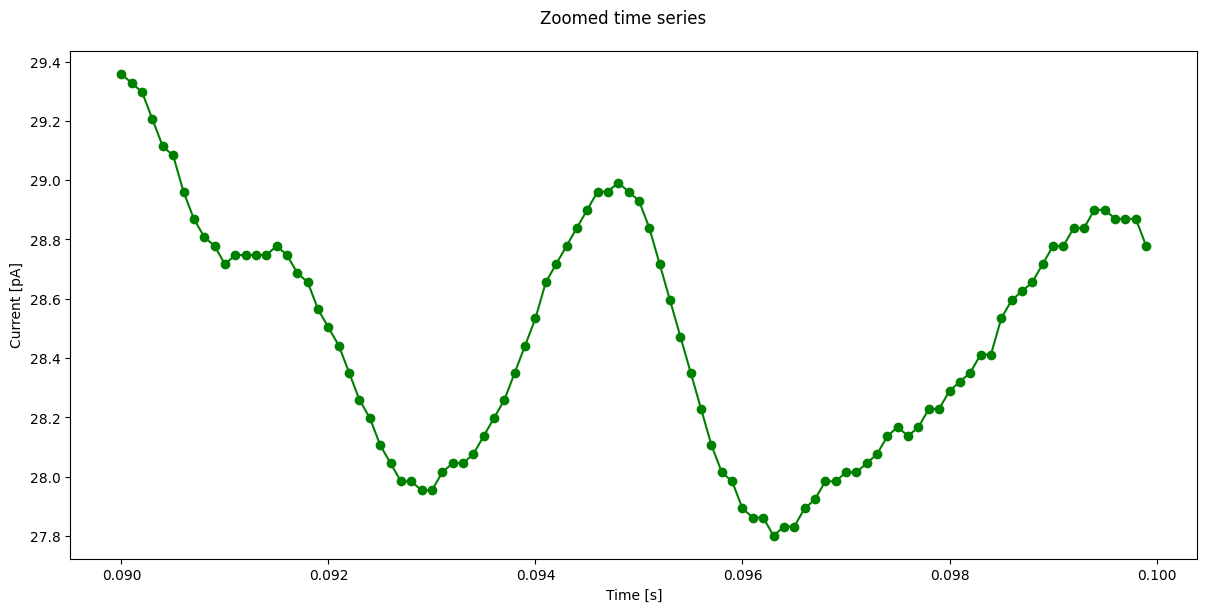

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-20mV', 'e37.txt']


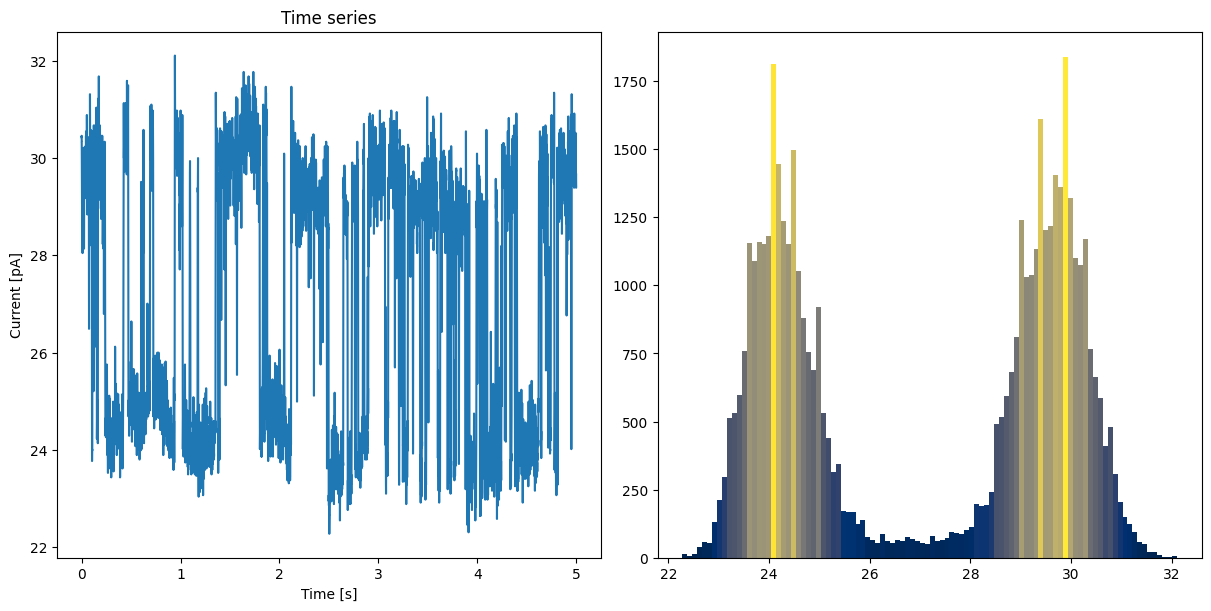

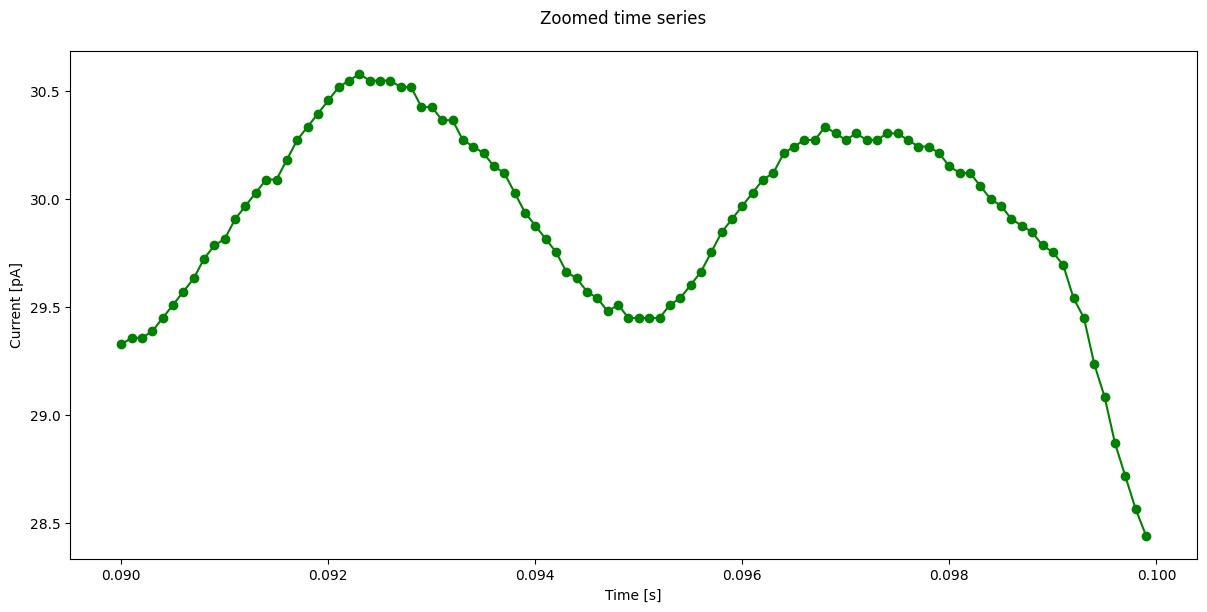

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-20mV', 'e79.txt']


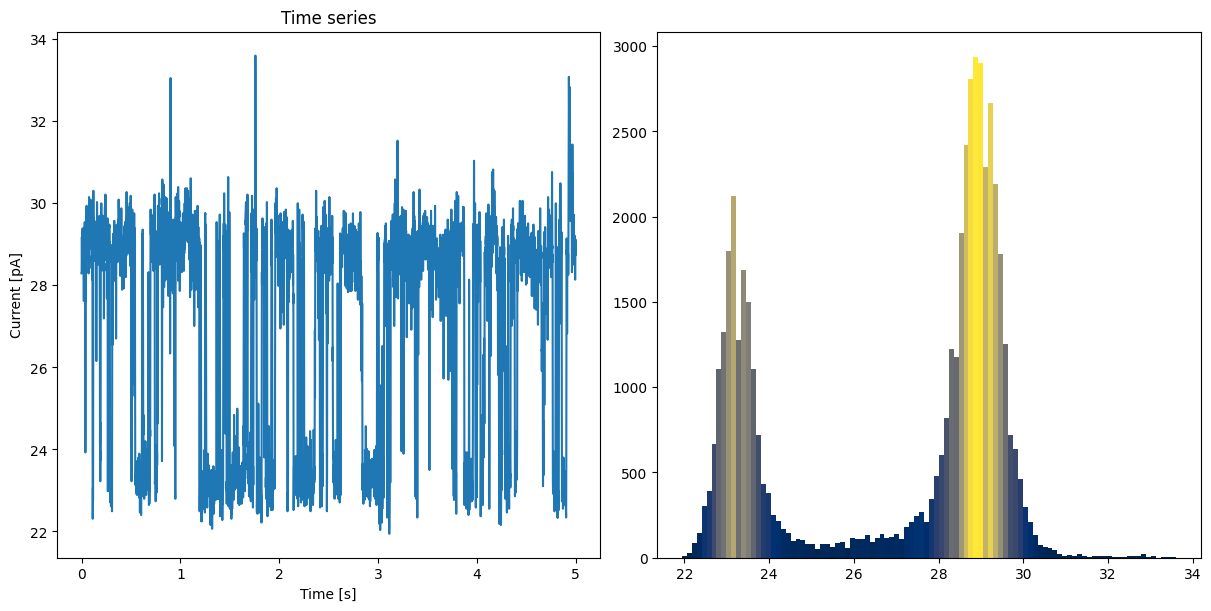

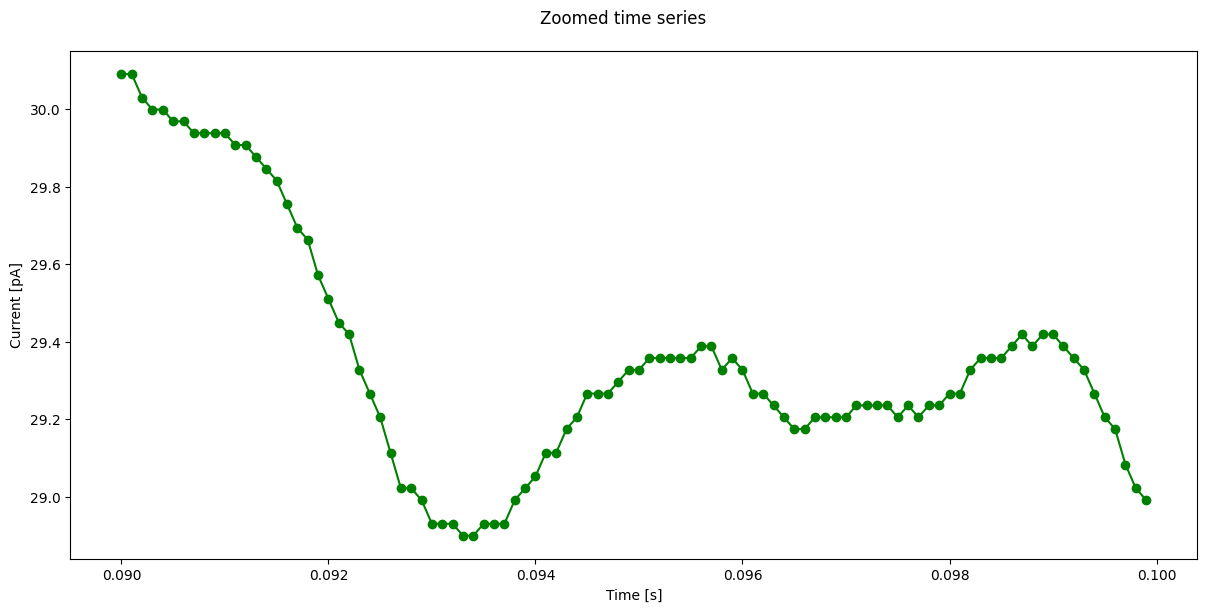

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-60mV', 'e18.txt']


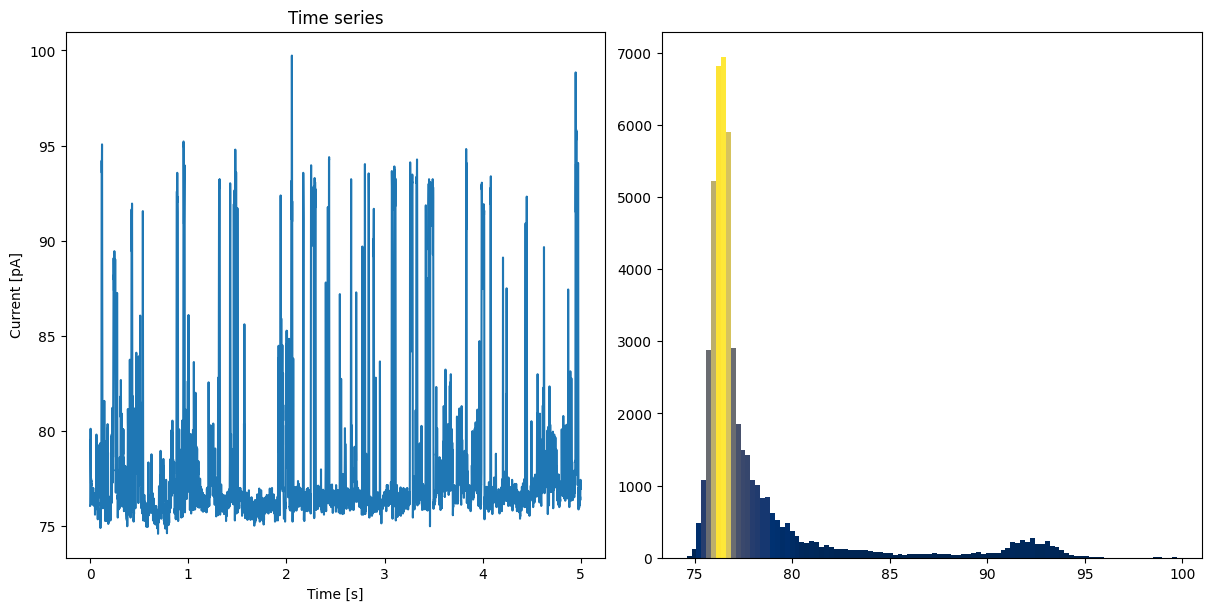

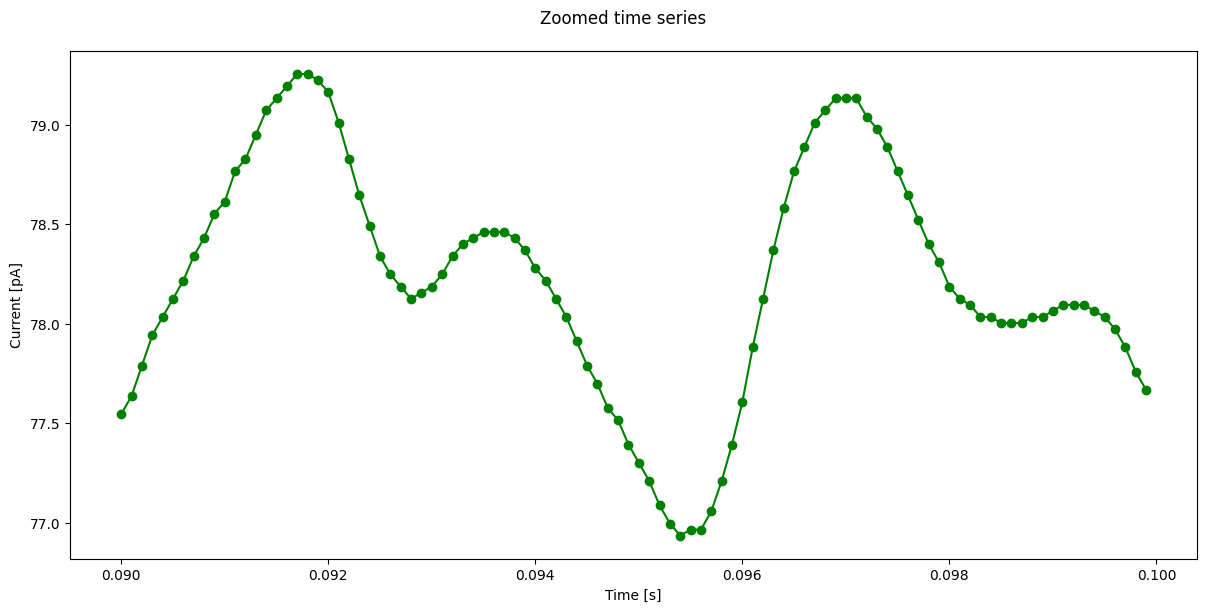

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-60mV', 'e67.txt']


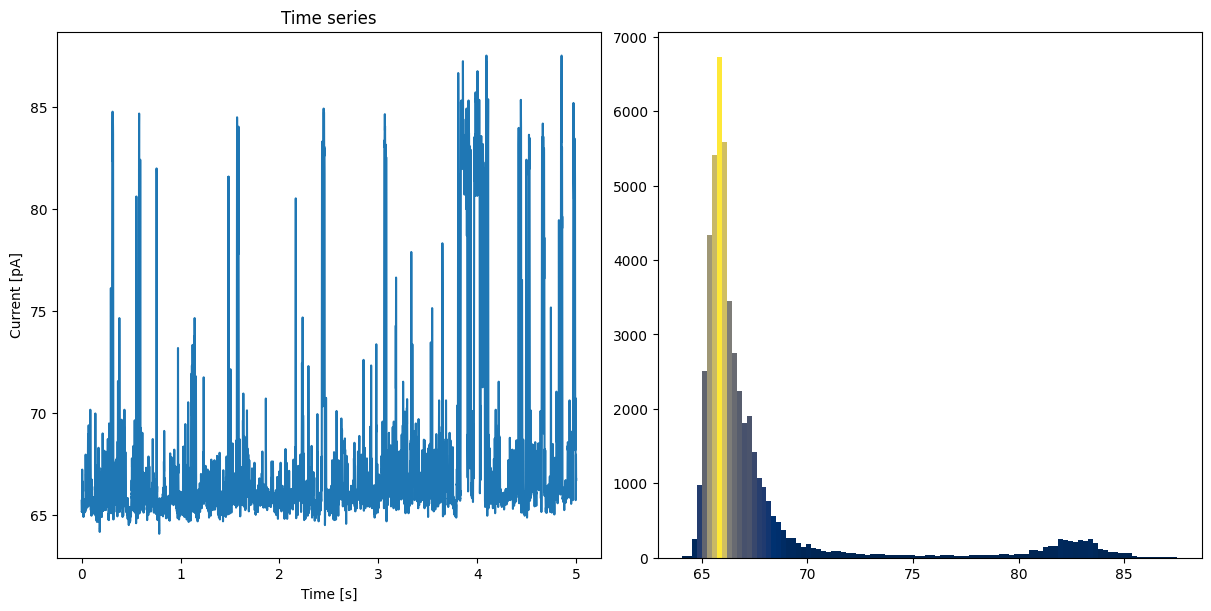

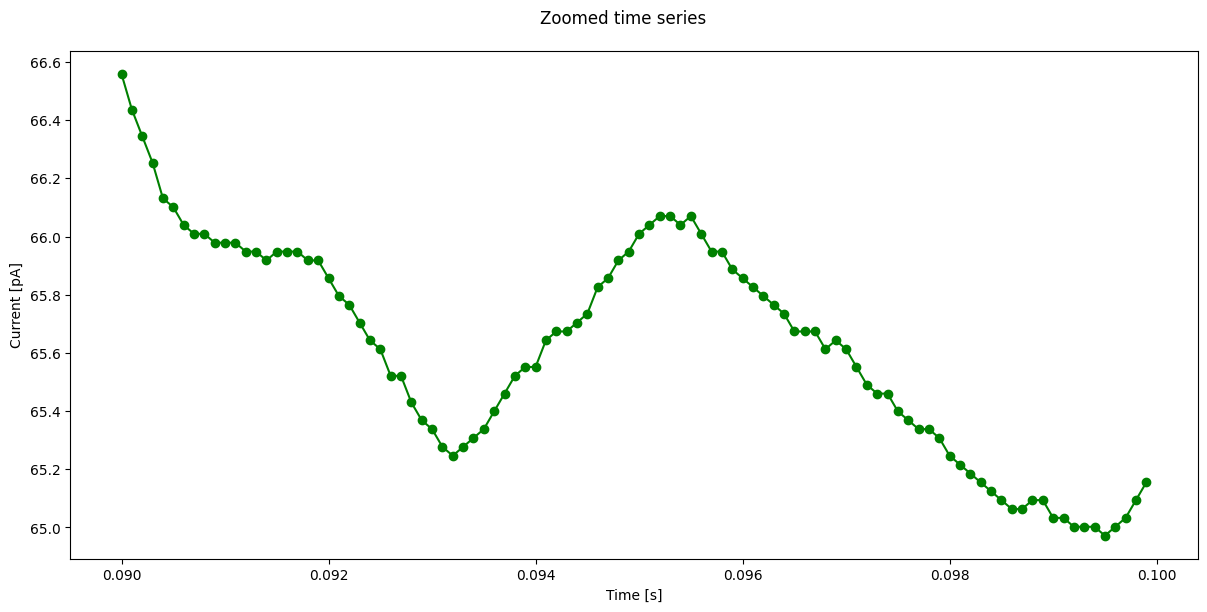

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-60mV', 'e46.txt']


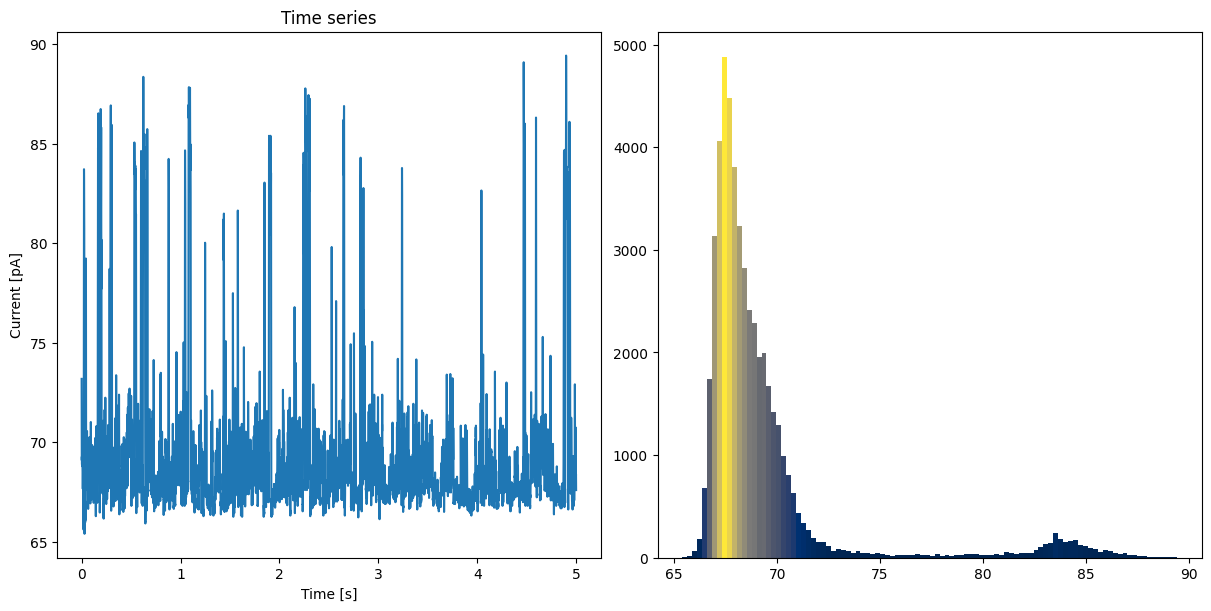

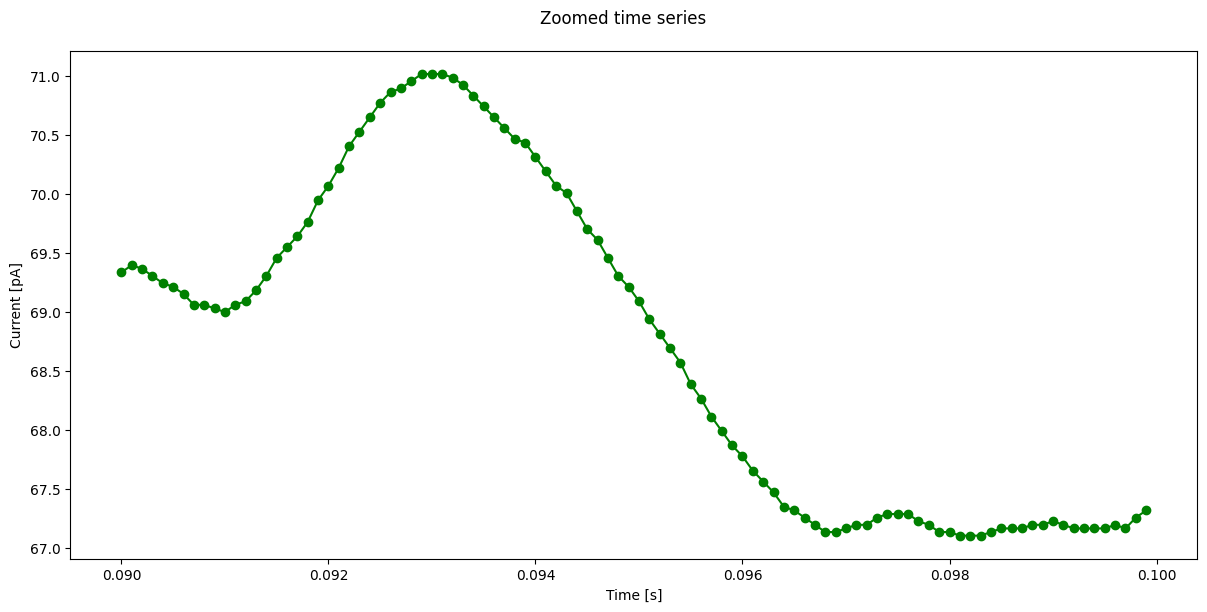

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-60mV', 'e39.txt']


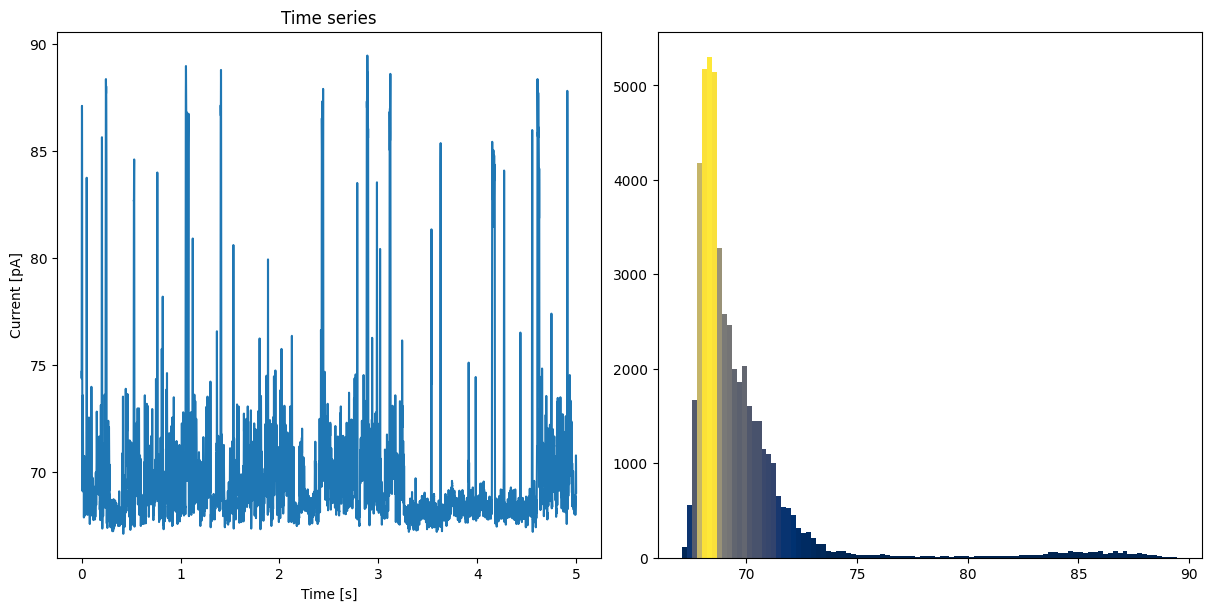

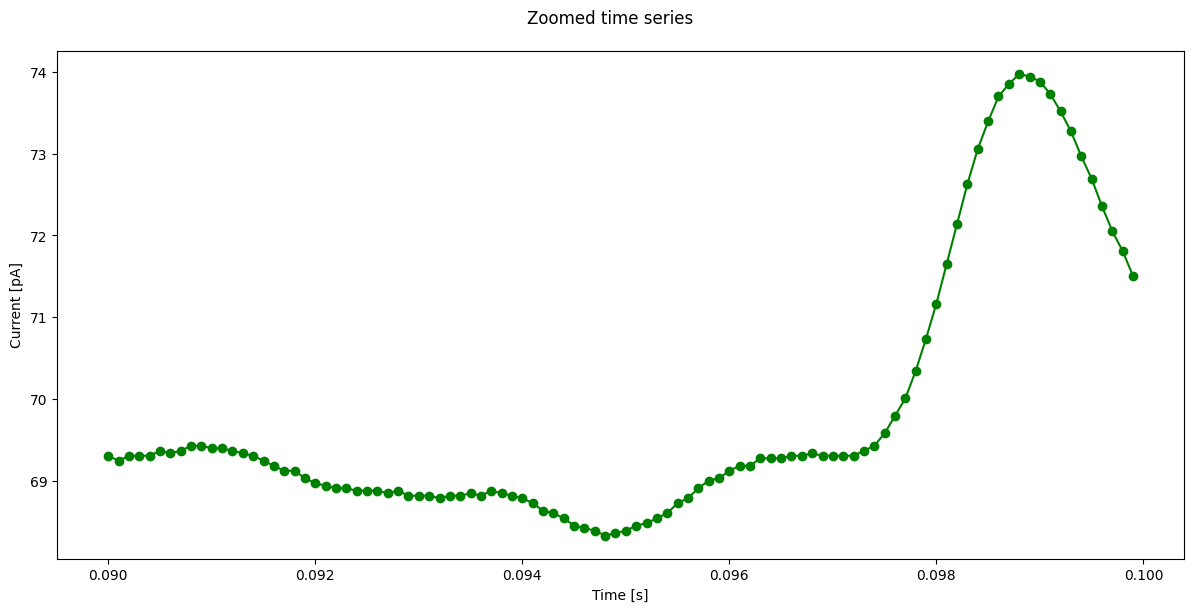

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '60mV', 'e33.txt']


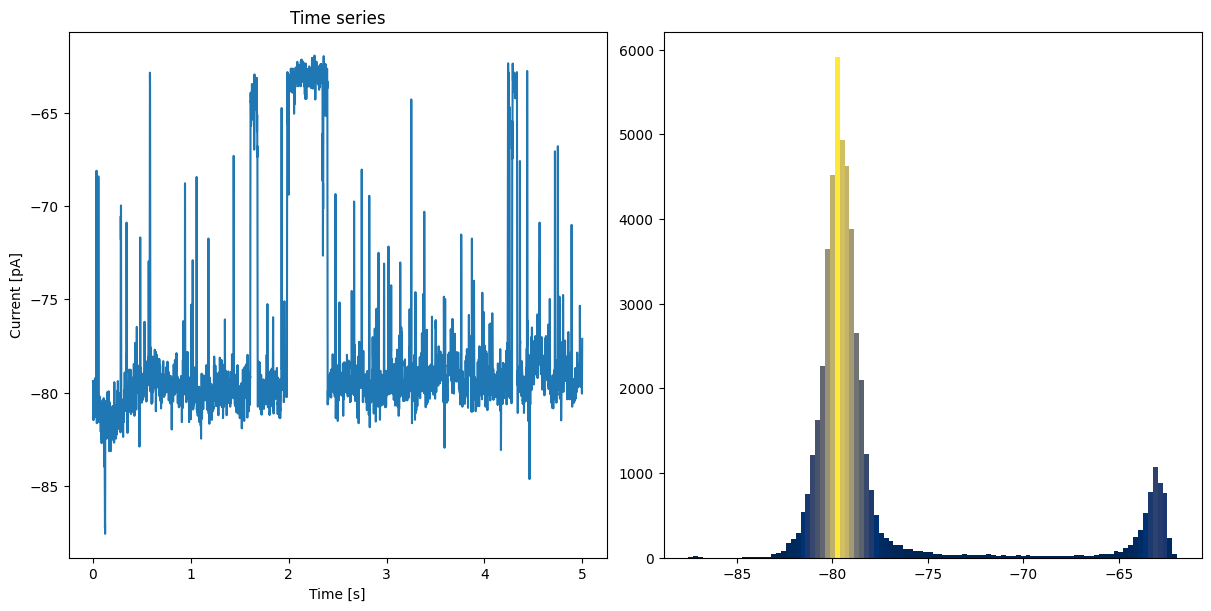

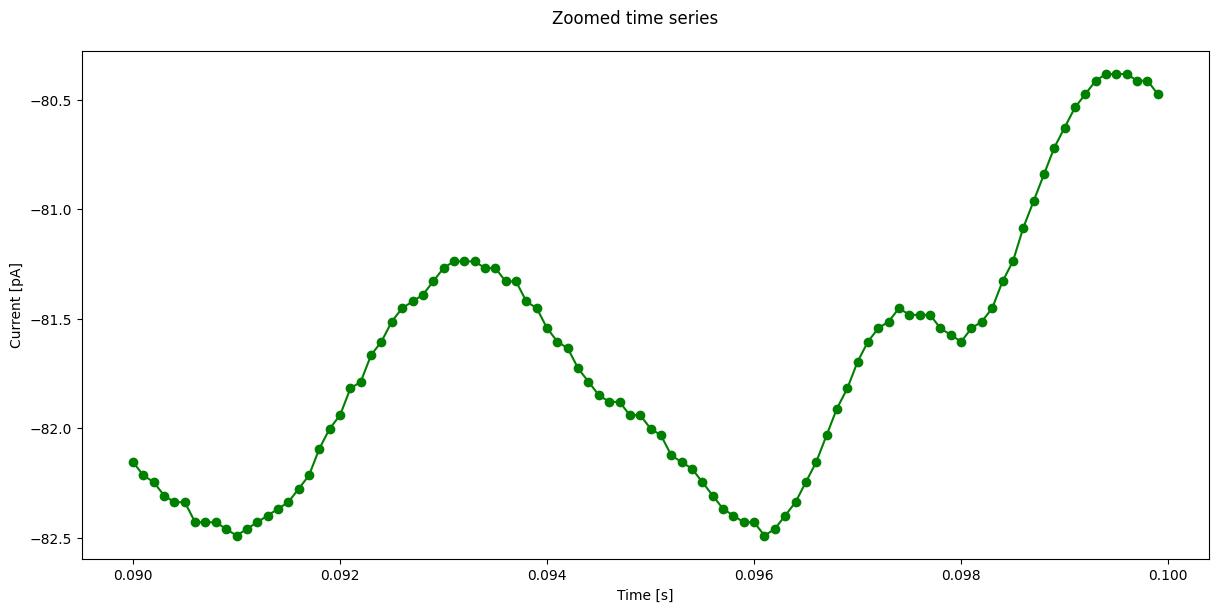

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '60mV', 'e40.txt']


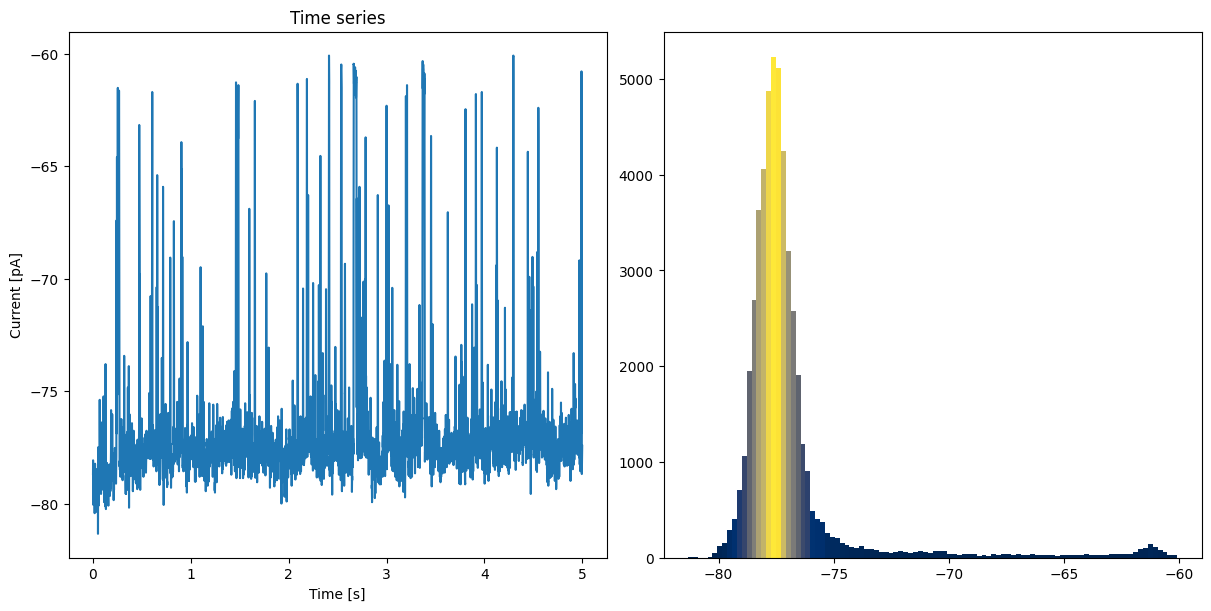

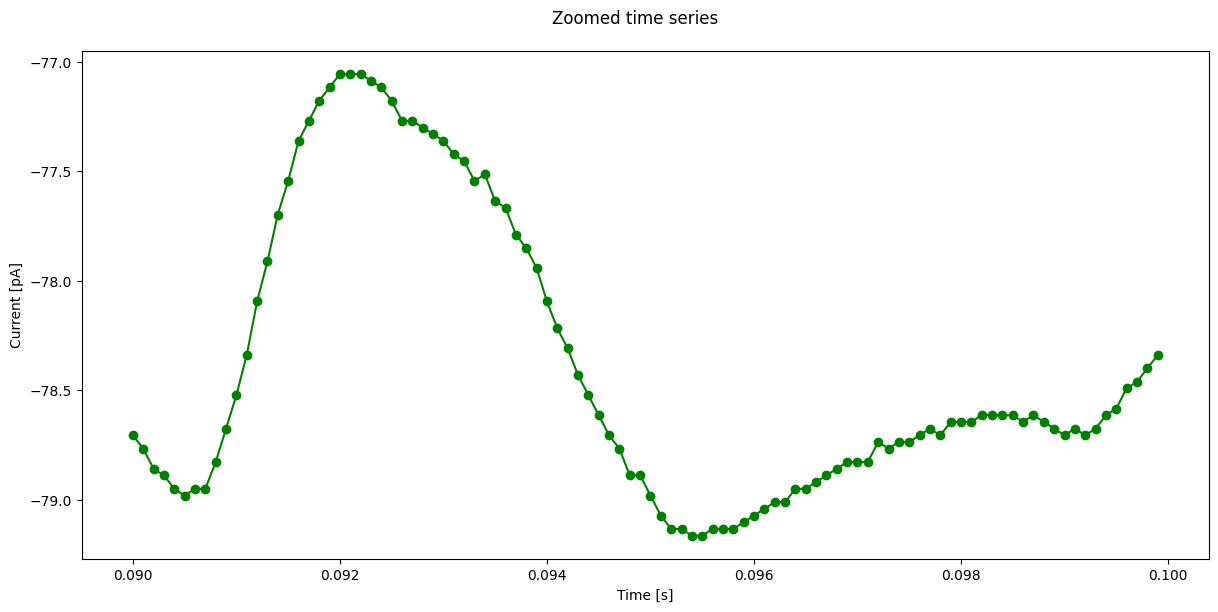

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '60mV', 'e19.txt']


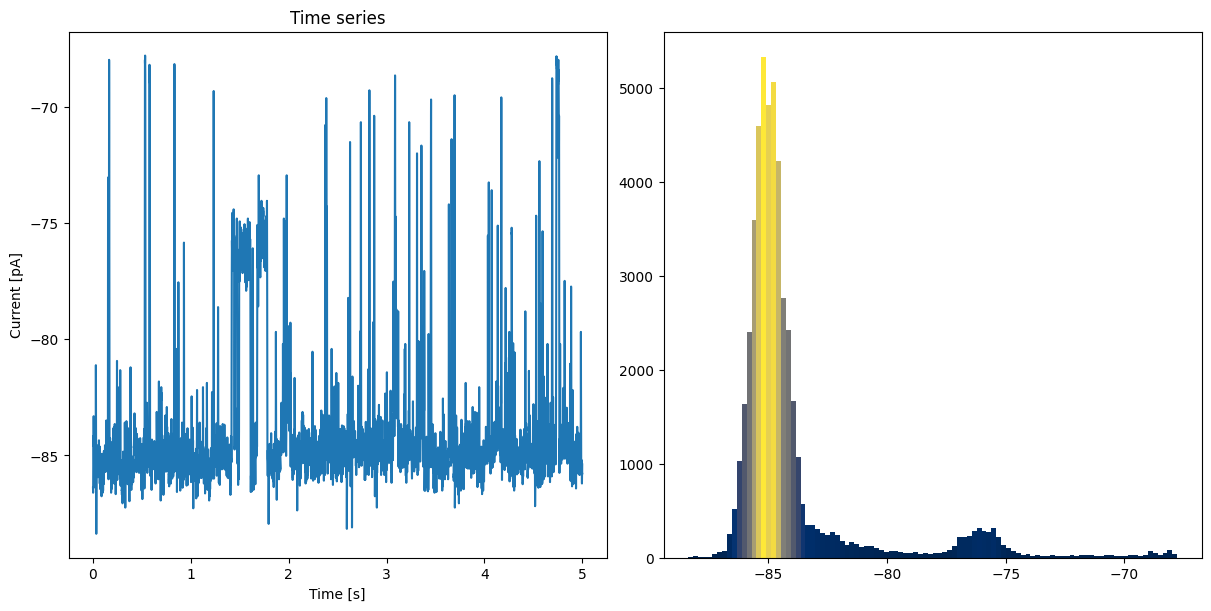

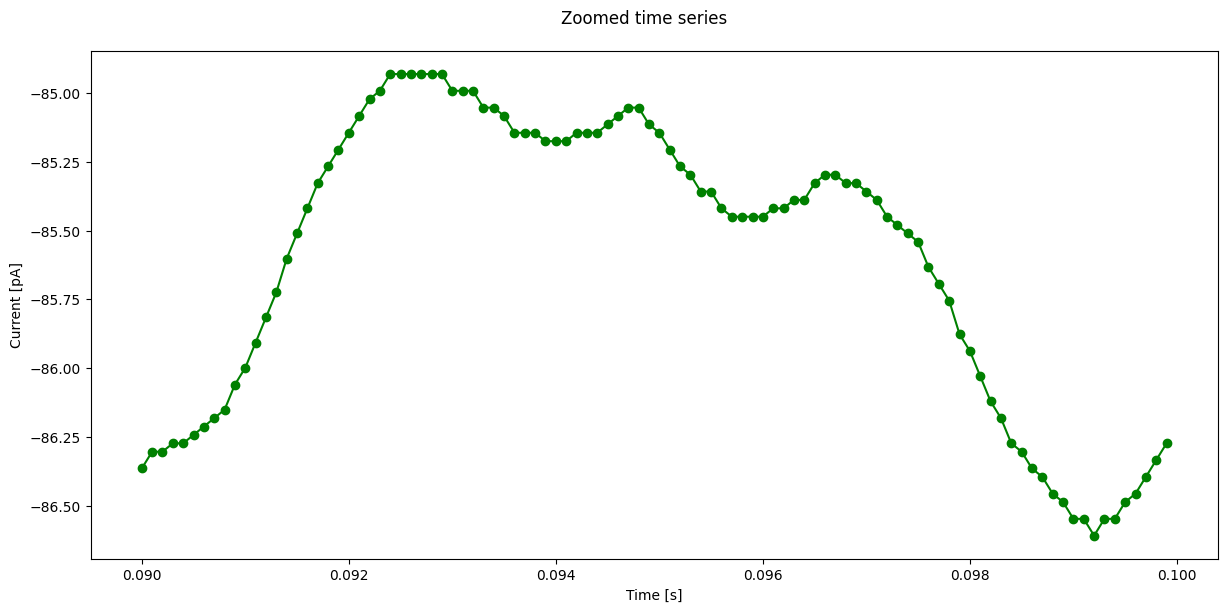

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-40mV', 'e66.txt']


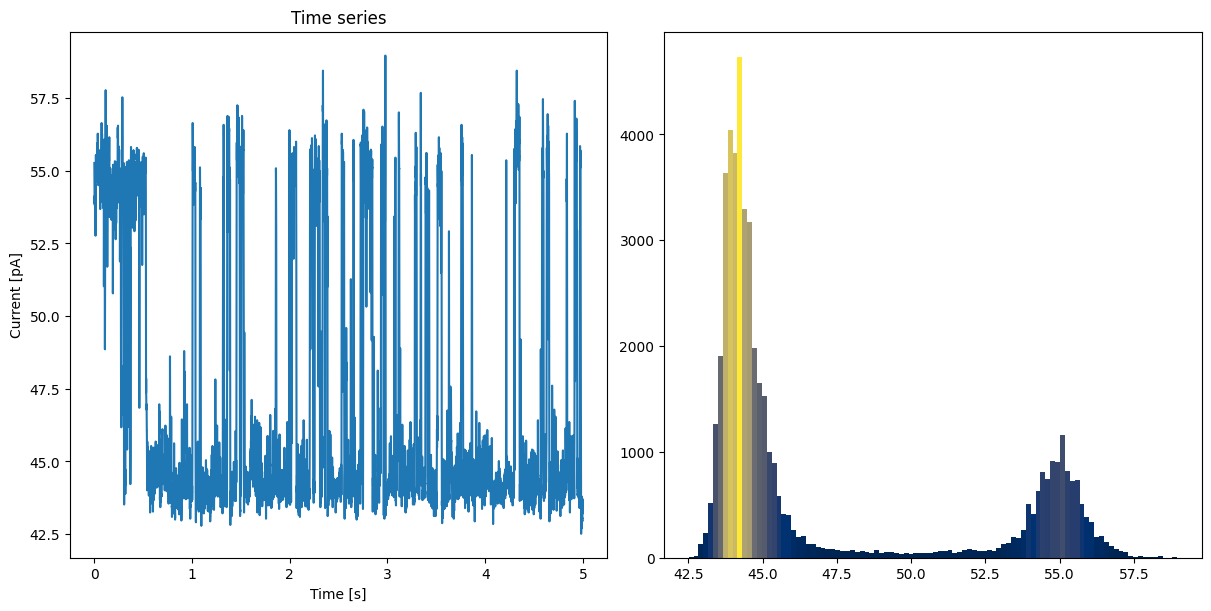

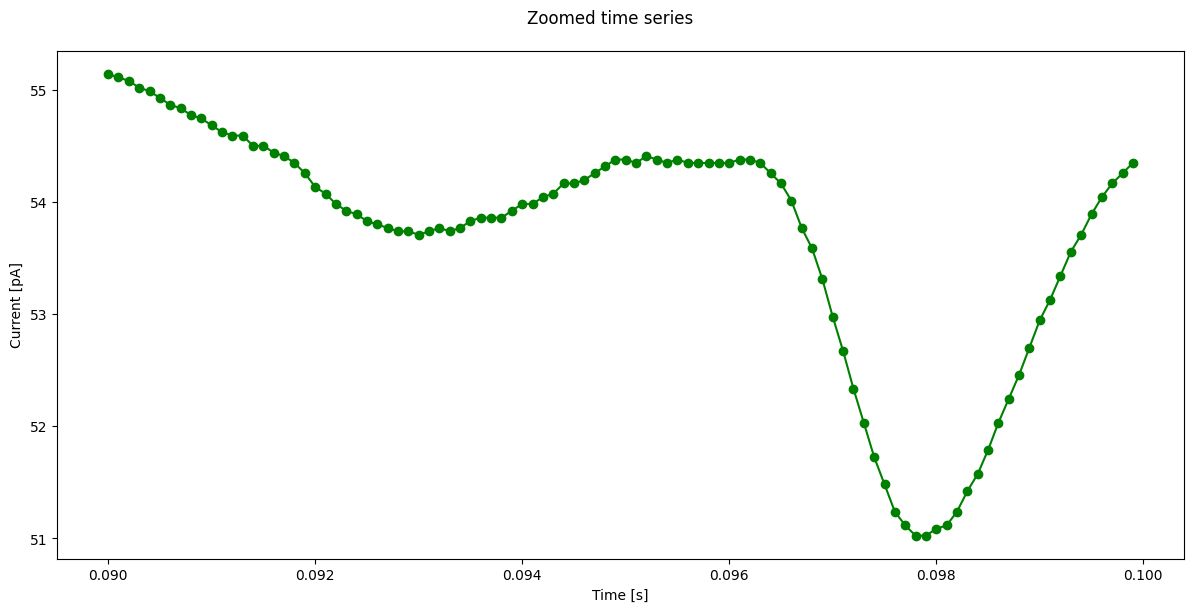

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-40mV', 'e24.txt']


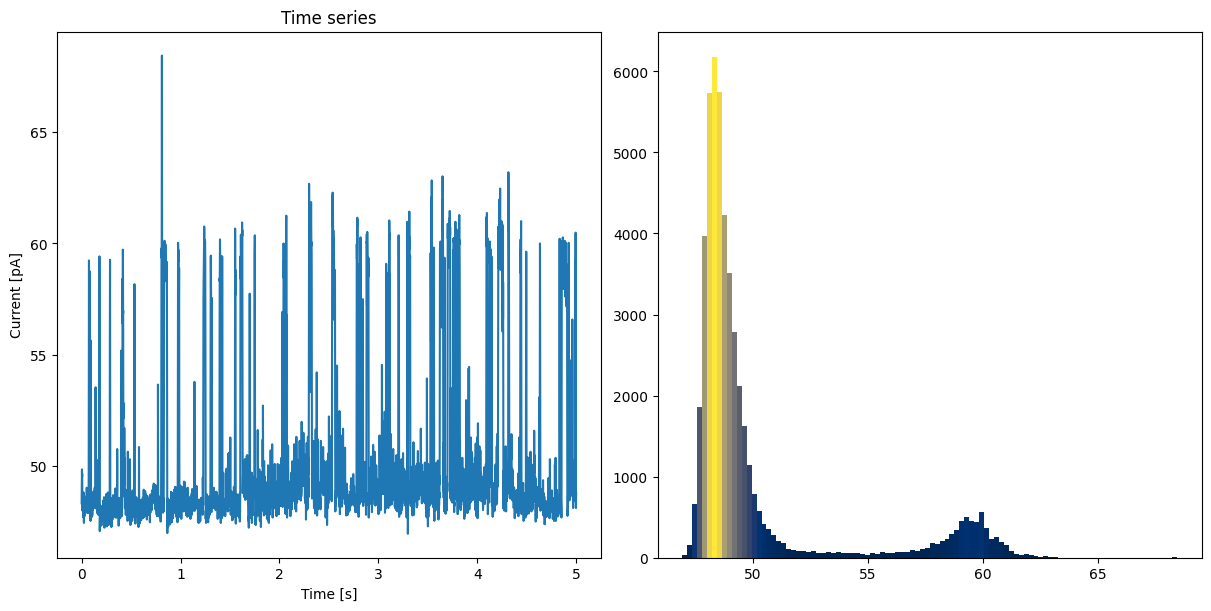

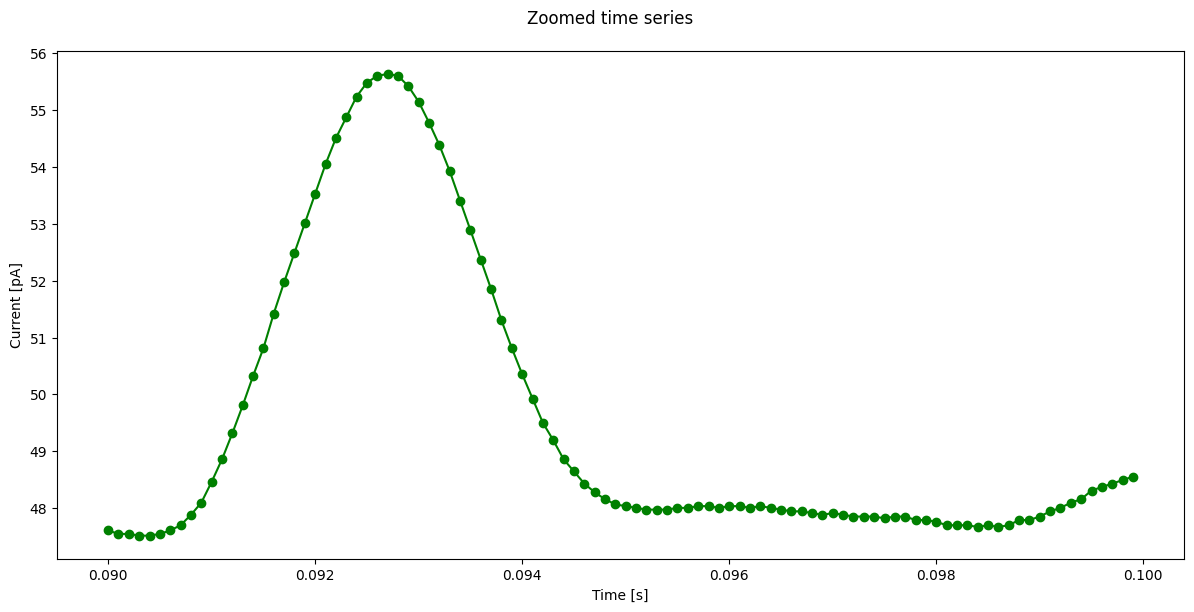

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-40mV', 'e38.txt']


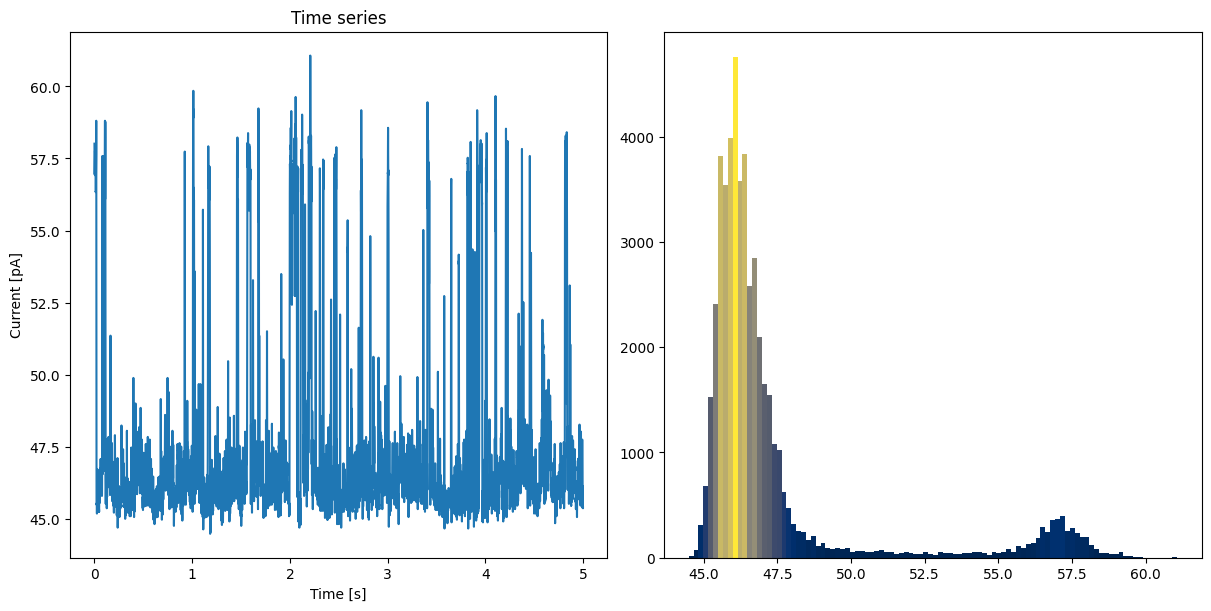

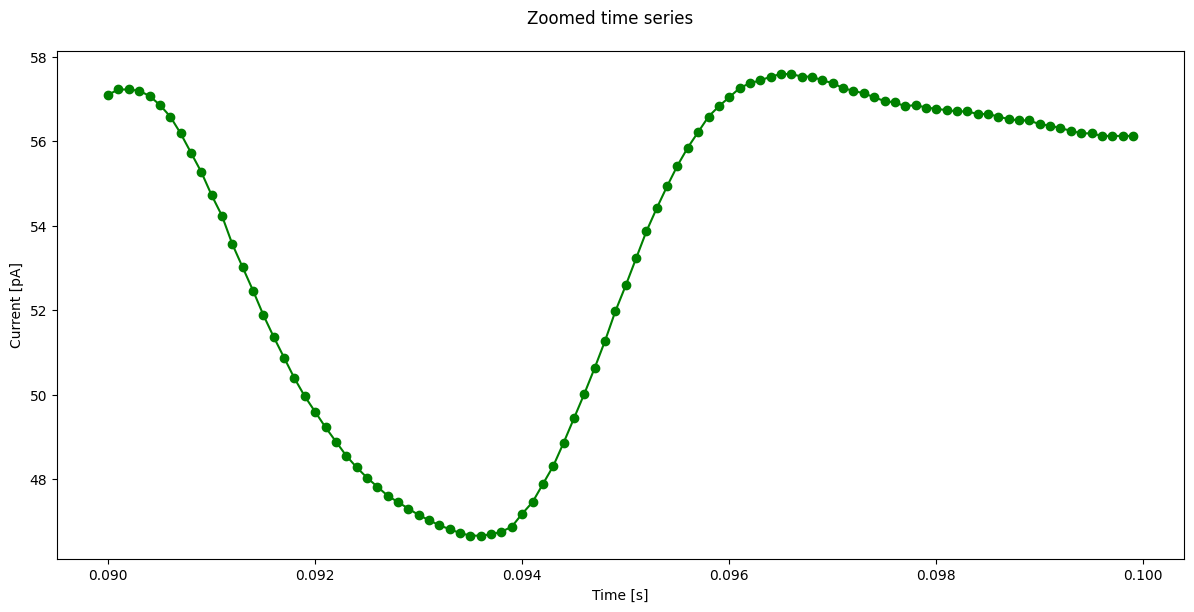

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-40mV', 'e45.txt']


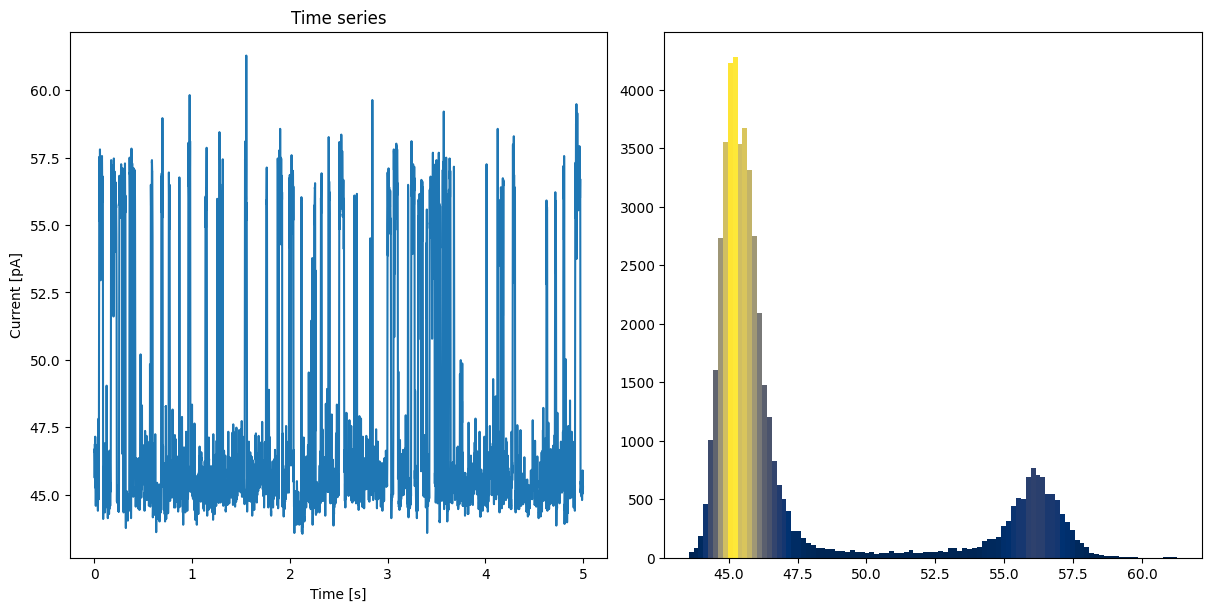

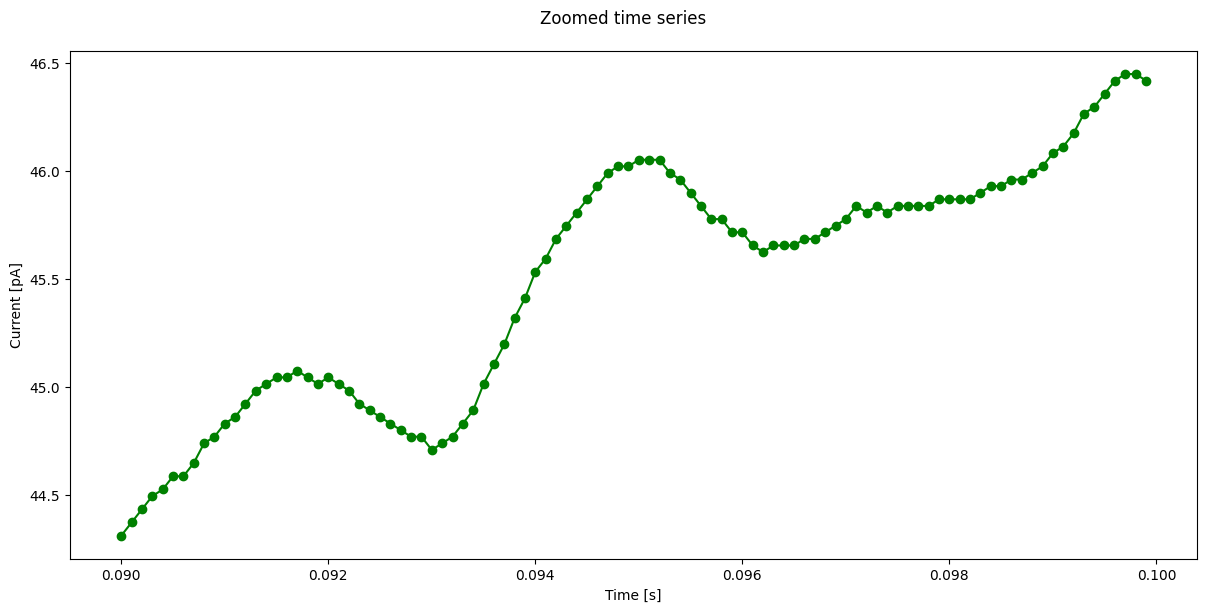

['', 'home', 'yoga-peter', 'engdeg', 'Jonus', 'data', 'normalna_aktywnosc', '-40mV', 'e10.txt']


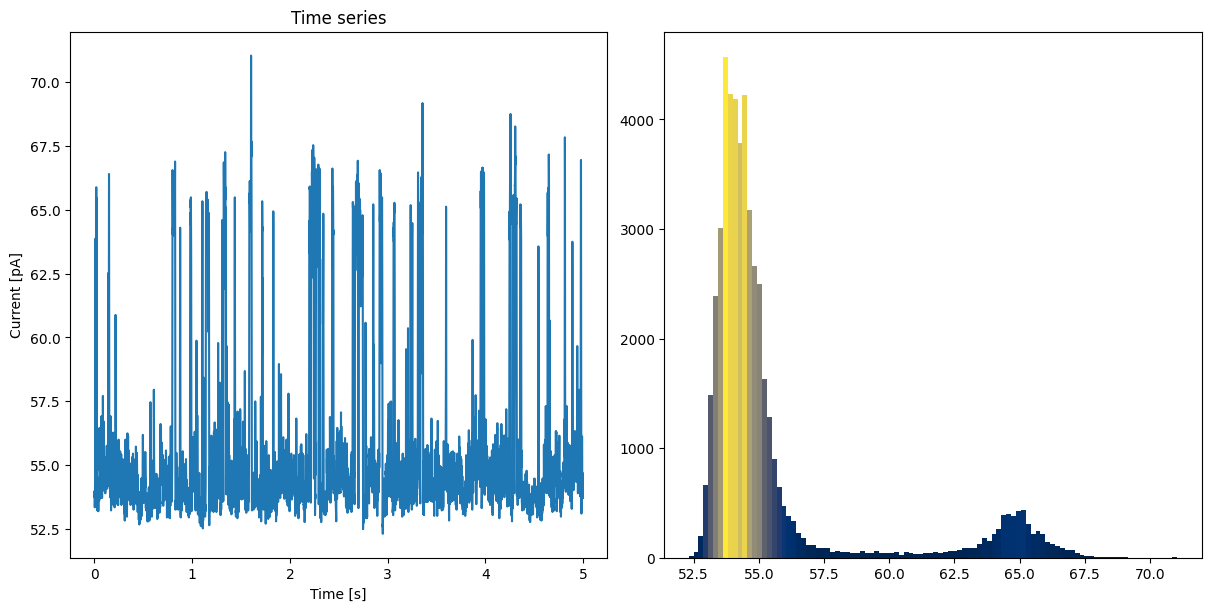

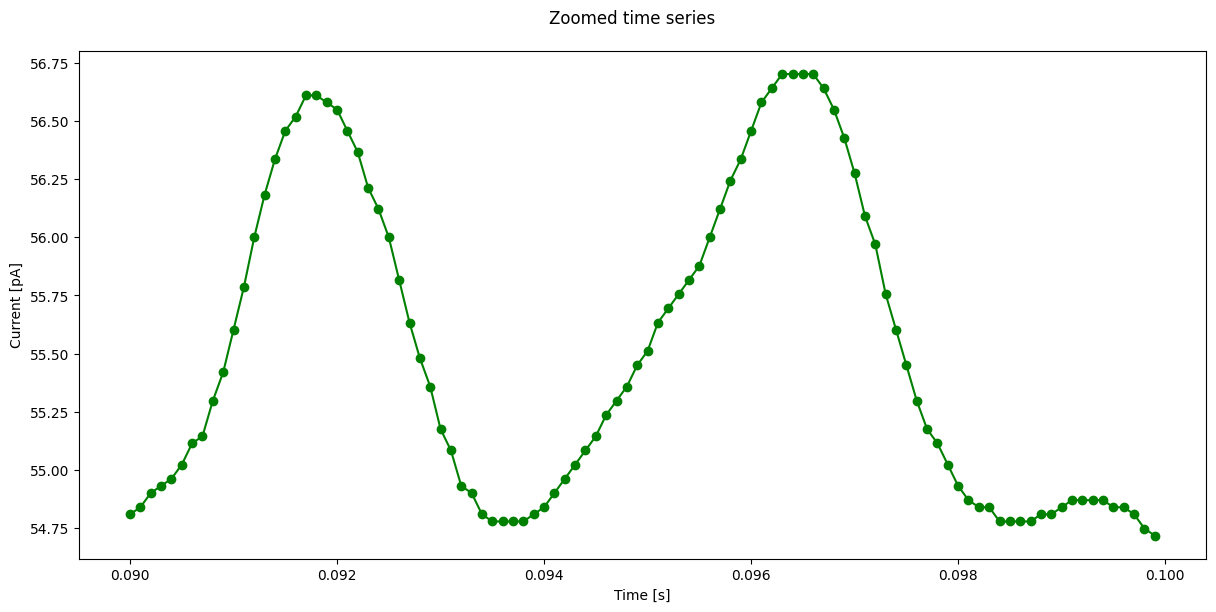

In [3]:
import os
os.chdir('/home/yoga-peter/engdeg/Jonus')
import glob
import matplotlib.pyplot as plt
from matplotlib import colors
# from monostable_model import calculate_autocorelation_dfa, calculate_autocorelation_acf
import numpy as np
from ion_channel import IonChannel
ic = IonChannel()
# Find all hip files in the data directory
print(os.getcwd())
file_pattern = os.path.join(os.getcwd(), "data", "normalna_aktywnosc", '*mV', "e*.txt")
files = glob.glob(file_pattern)
batch_size = 1
# Process each file
for file_path in files:
    cnt = 0
    sum = 0
    file_data = []
    
    with open(file_path) as data_file:
        for record in data_file:
            if cnt < batch_size:
                record = record.strip()
                sum += float(record)
                cnt += 1
            else:
                cnt = 0
                file_data.append(sum / batch_size)
                sum = 0

    batch = 50000
    times = np.linspace(0, batch*0.0001, batch, endpoint=False)
    ic.data_transposed = np.array([times, file_data[:batch]])
    # Calculate autocorrelation
    _ = file_path.split('/')
    print(_)
    file_name = _[-2] + '_' + _[-1]
    file_name = file_name.split('.')[0]
    fig, axs = plt.subplots(1, 2, constrained_layout=True)
    fig.set_size_inches(12, 6)
    ic._opened_larger = True
    axs[0].set_title("Time series")
    axs[0].plot(ic.data_transposed[0], ic.data_transposed[1])
    axs[0].set_xlabel("Time [s]")
    axs[0].set_ylabel("Current [pA]")

    
    sub_fig, sub_ax = plt.subplots()
    sub_fig.set_size_inches(12, 6)
    sub_fig.suptitle('Zoomed time series')
    sub_fig.tight_layout()
    sub_ax.set_xlabel("Time [s]")
    sub_ax.set_ylabel("Current [pA]")
    sub_ax.plot(ic.data_transposed[0][900:1000], ic.data_transposed[1][900:1000], 'go-')
    ic.save_figure(sub_fig, title=_[-2], name=file_name+'_zoomed', with_subfigures=False)

    N, bins, patches = axs[1].hist(ic.data_transposed[1], bins=100)
    fracs = N / N.max()
    norm = colors.Normalize(fracs.min(), fracs.max())
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.cividis(norm(thisfrac))
        thispatch.set_facecolor(color)
    ic.save_figure(fig, title=_[-2], name=file_name, with_subfigures=False)
    plt.show()
    